# Travel Package Purchase Prediction_Project_GAP

By: Glen A Patterson

Date: 10-29-2022

## Problem Statment:

Analyze the customers data and information given by "Visit with us" travel company to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package called "Wellness Tourism Package".

## Objective:

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary:

- **Customer details:**

1.  CustomerID: Unique customer ID
2.  ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3.  Age: Age of customer
4.  TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5.  CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
6.  Occupation: Occupation of customer
7.  Gender: Gender of customer
8.  NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9.  PreferredPropertyStar: Preferred hotel property rating by customer
10.  MaritalStatus: Marital status of customer
11.  NumberOfTrips: Average number of trips in a year by customer
12.  Passport: The customer has a passport or not (0: No, 1: Yes)
13.  OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14.  NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15.  Designation: Designation of the customer in the current organization
16.  MonthlyIncome: Gross monthly income of the customer

- **Customer interaction data:** 

1.  PitchSatisfactionScore: Sales pitch satisfaction score
2.  ProductPitched: Product pitched by the salesperson
3.  NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4.  DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Importing the necessary libraries:

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build the Logistic regression_model
from sklearn.linear_model import LogisticRegression

# To check model performance
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# To build and visualize the Decision Tree_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Hyperparameter Tuning of the Decision Tree to build a better model
from sklearn.model_selection import GridSearchCV

# To build the Bagging and RandomForest models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# To build the boosting models AdaBoost, GradientBoosting, and Stacking
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# To build the XGBoost model
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [2]:
# Load the Microsoft Excel file and call the dataframe "TravelPackage"
TravelPackage = pd.read_excel("Tourism.xlsx", "Tourism")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "TravelPackage" and call it "data".  We will be modifying this dataframe
data = TravelPackage.copy()

<IPython.core.display.Javascript object>

In [4]:
# Observing the head of the first 10 rows of the dataset to make sure it loaded correctly and examine the data.
data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


<IPython.core.display.Javascript object>

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

- We can see that there is 4,888 rows and 20 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

- There is missing data in this dataset
- There is 763.9KB memory used
- There is seven "float64", seven "int64", and six "object" data types

In [8]:
# Explore the Statistics in data and look for outliers in dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<IPython.core.display.Javascript object>

In [9]:
# Imputing missing values in TypeofContact column with mode
data["TypeofContact"].replace([np.nan], data["TypeofContact"].mode()[0], inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# Imputing missing values in the columns with the median for the column
data = data.fillna(data.median())

<IPython.core.display.Javascript object>

In [11]:
# Converting float64 to Int64 for the following columns
data["Age"] = data["Age"].astype(np.int64)
data["DurationOfPitch"] = data["DurationOfPitch"].astype(np.int64)
data["NumberOfFollowups"] = data["NumberOfFollowups"].astype(np.int64)
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].astype(np.int64)
data["NumberOfTrips"] = data["NumberOfTrips"].astype(np.int64)
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].astype(np.int64)
data["MonthlyIncome"] = data["MonthlyIncome"].astype(np.int64)

<IPython.core.display.Javascript object>

In [12]:
# Check the different types of values entered in dataset and there value counts
print(data.TypeofContact.value_counts())
print(data.Occupation.value_counts())
print(data.Gender.value_counts())
print(data.ProductPitched.value_counts())
print(data.MaritalStatus.value_counts())
print(data.Designation.value_counts())

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


<IPython.core.display.Javascript object>

In [13]:
# Converting "Fe Male" to "Female" in Gender column
for idx, row in data.iterrows():
    if data.loc[idx, "Gender"] == "Fe Male":
        data.loc[idx, "Gender"] = "Female"

<IPython.core.display.Javascript object>

In [14]:
# Check the update to Gender column and there value counts
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# Drop CustomerID from the dataset as it will not be needed for modeling
data = data.drop(columns="CustomerID")

<IPython.core.display.Javascript object>

In [16]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ProdTaken                 4888 non-null   int64 
 1   Age                       4888 non-null   int64 
 2   TypeofContact             4888 non-null   object
 3   CityTier                  4888 non-null   int64 
 4   DurationOfPitch           4888 non-null   int64 
 5   Occupation                4888 non-null   object
 6   Gender                    4888 non-null   object
 7   NumberOfPersonVisiting    4888 non-null   int64 
 8   NumberOfFollowups         4888 non-null   int64 
 9   ProductPitched            4888 non-null   object
 10  PreferredPropertyStar     4888 non-null   int64 
 11  MaritalStatus             4888 non-null   object
 12  NumberOfTrips             4888 non-null   int64 
 13  Passport                  4888 non-null   int64 
 14  PitchSatisfactionScore  

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate analysis:

In [17]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observation on ProdTaken

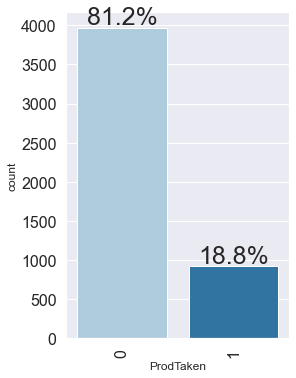

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "ProdTaken", 1, perc=True)

- 81.2% of customers did not purchase a package from "Visit with us" travel company
- 18.8% of customers did purchase a package from "Visit with us" travel company

#### Observation on Age

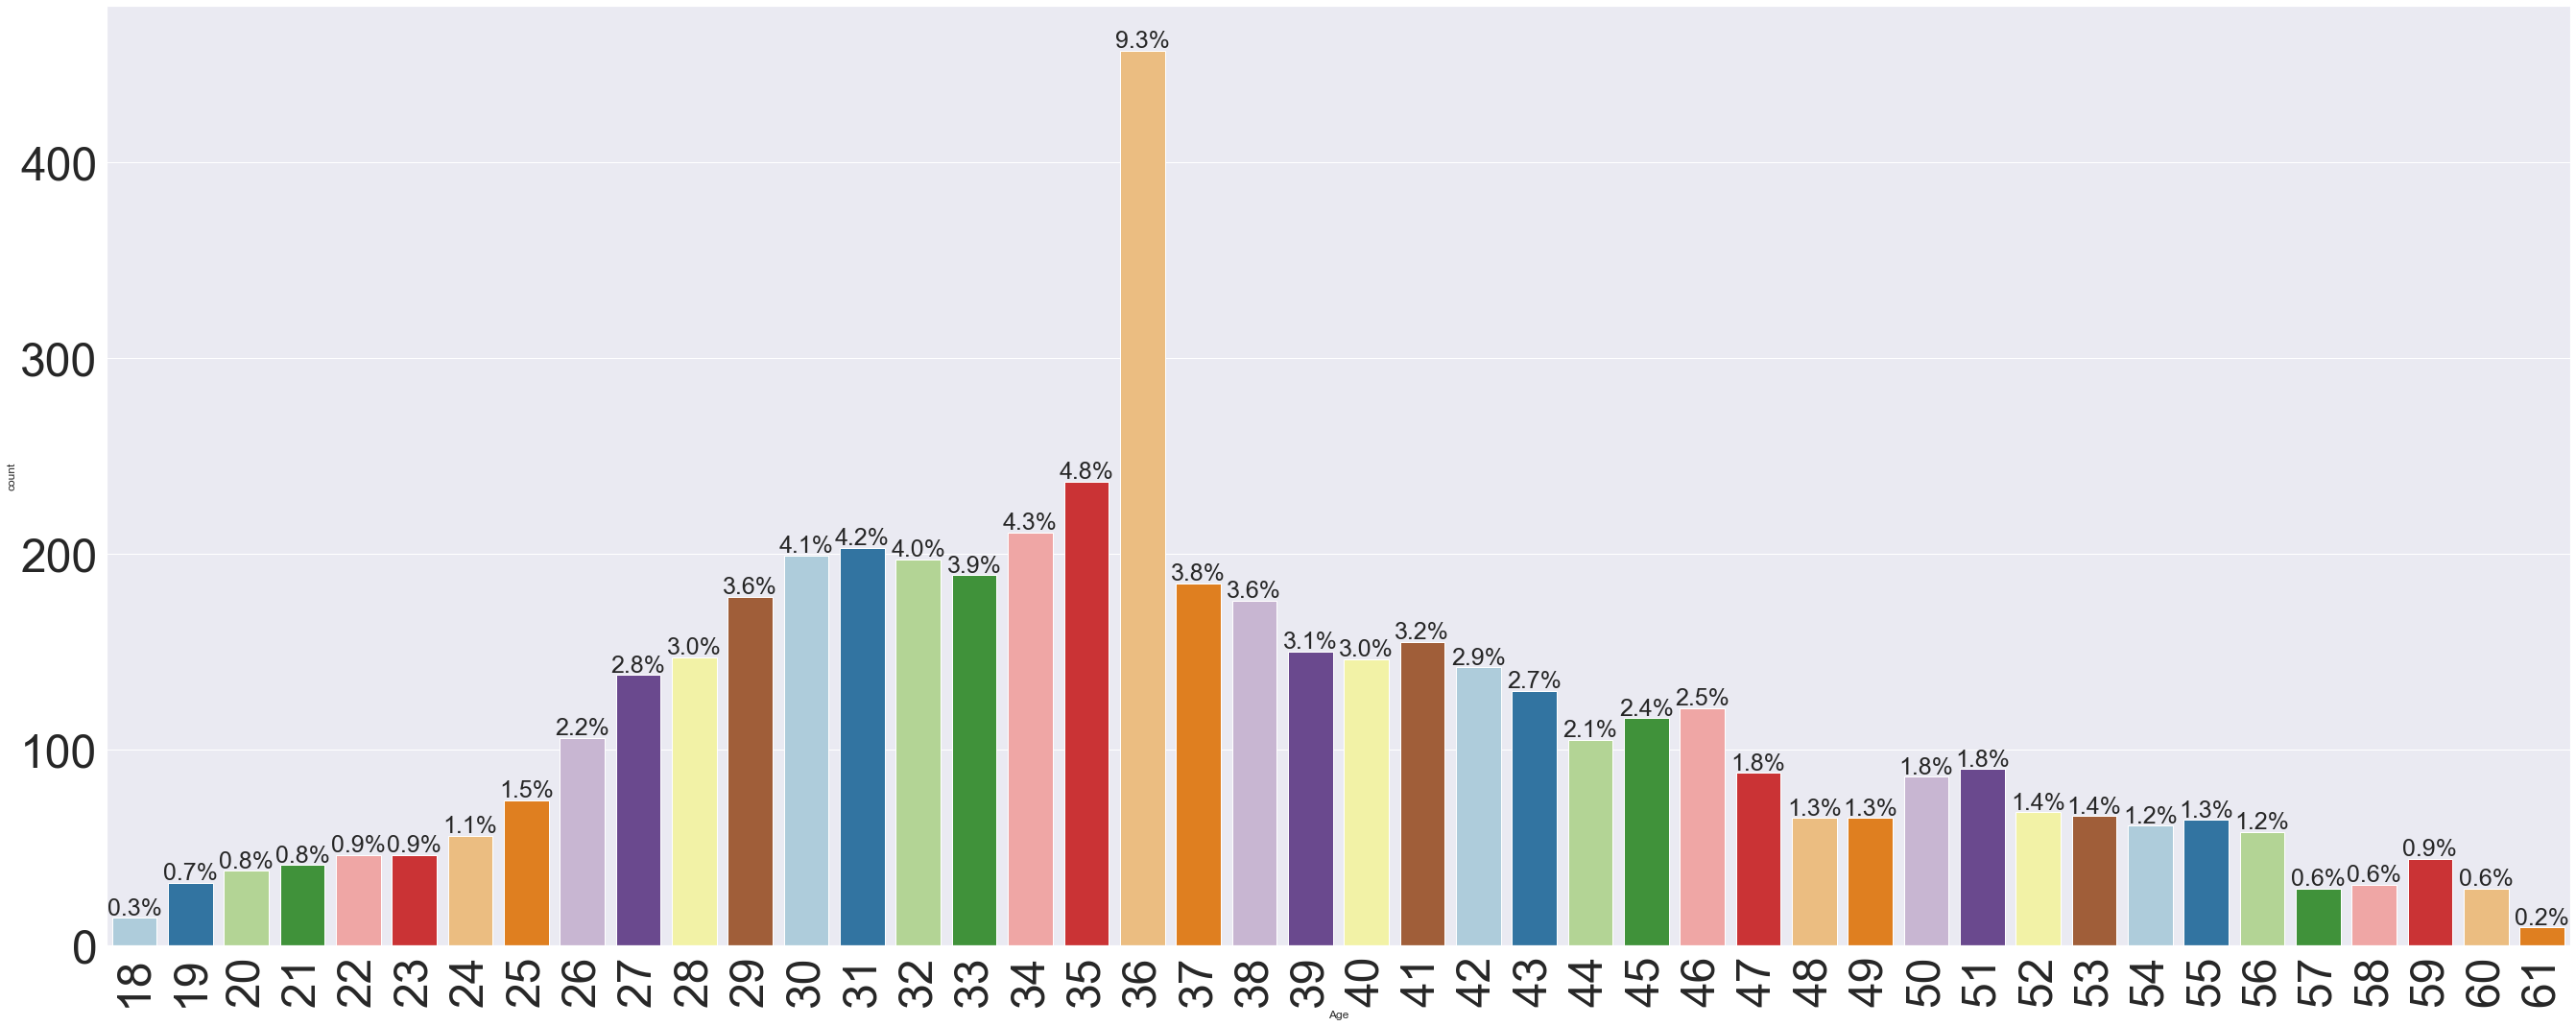

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(data, "Age", perc=True)

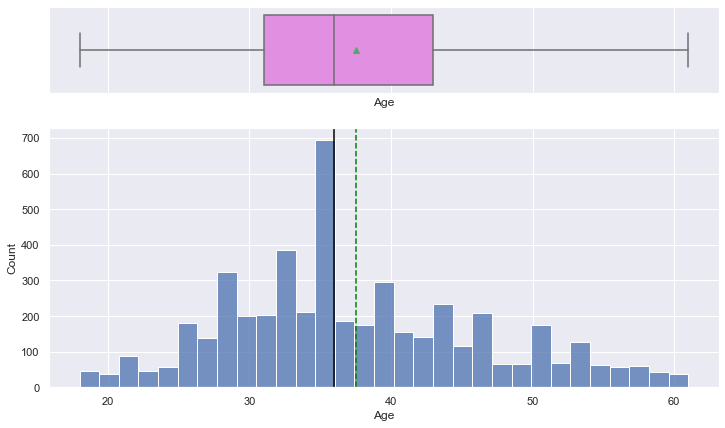

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Age")

- The Median Age is 36 years old, youngest age is 18 and oldest is 61 years old
- The IQR is between age 31 and 44 with a mean of 37.6
- There is no outliers in age

#### Observation on TypeofContact

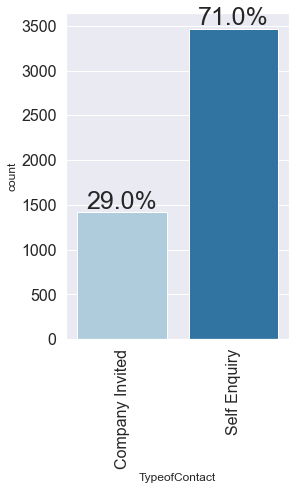

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "TypeofContact", 1, perc=True)

- 29.0% of the customers was contacted by Company Invited
- 71.0% of the customers was contacted by Self Enquiry

#### Observation on CityTier

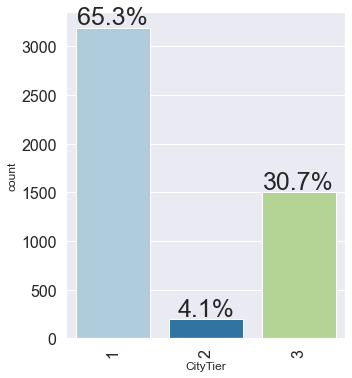

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "CityTier", 1, perc=True)

- 65.3% of the customers live in Tier1 city
- 4.1% of the customers live in Tier2 city
- 30.7% of the customers live in Tier3 city

#### Observation on DurationOfPitch

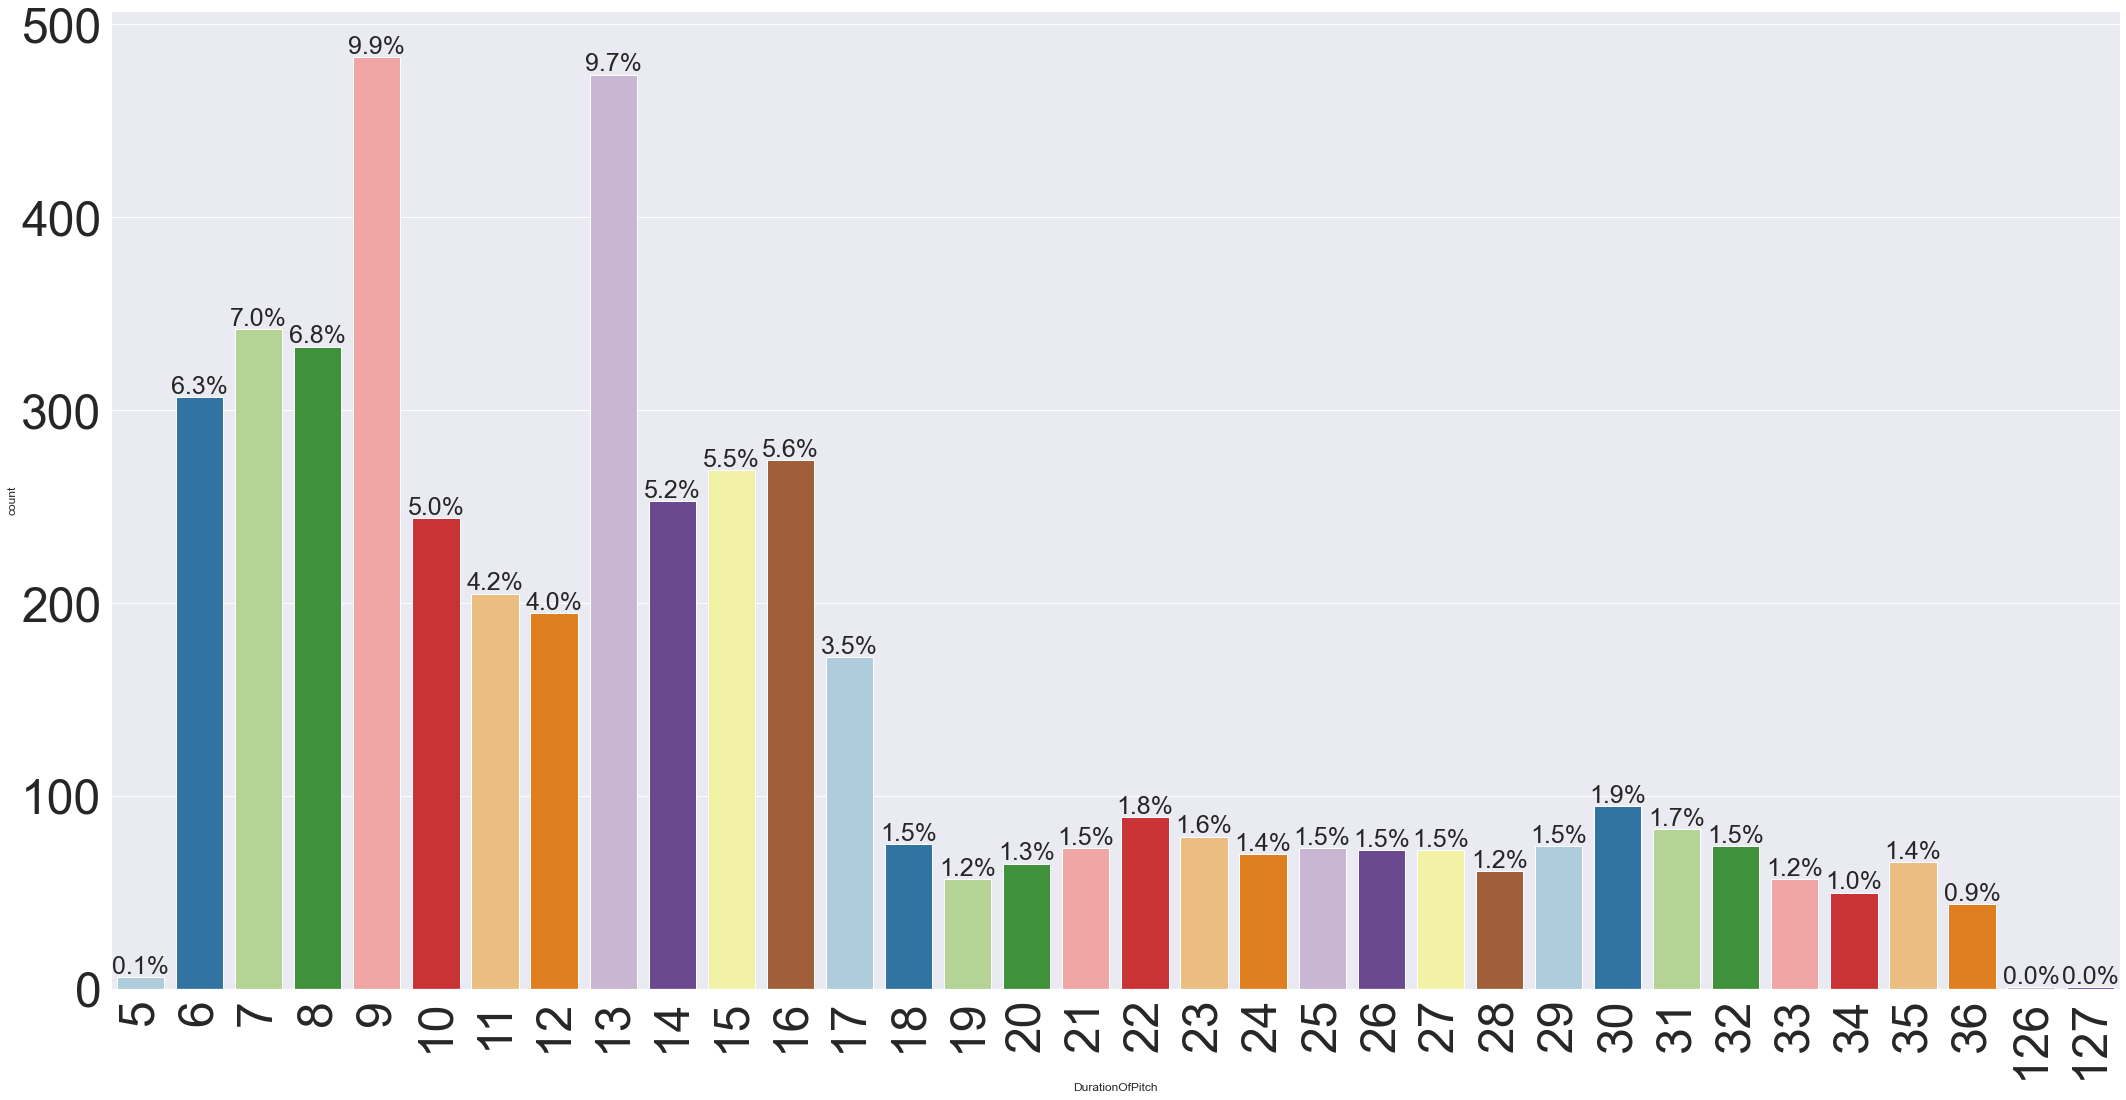

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "DurationOfPitch", perc=True)

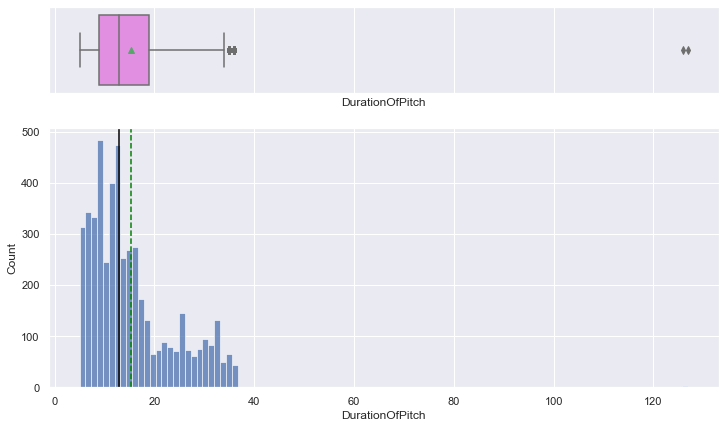

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "DurationOfPitch")

- Duration of Pitch by a salesperson to the customer ranges from 5 to 127
- The Histogram shows Duration of Pitch is right skewed
- The IQR is between 9 and 20 Duration of Pitch with a mean of 15.5
- There is some outliers with Duration of Pitch of 35 or more

#### Observation on Occupation

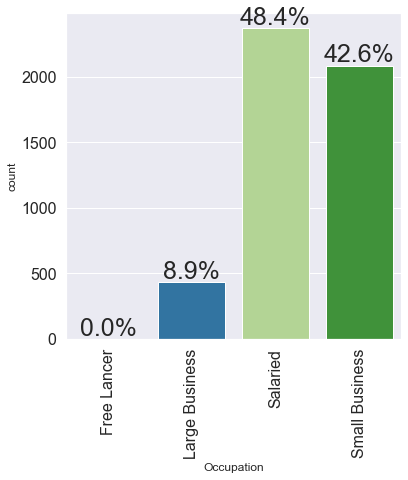

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "Occupation", 1, perc=True)

- 0.0% of the customers Occupation is Free Lancers (only 2 customers are Free Lancers)
- 8.9% of the customers Occupation is Large Business
- 48.4% of the customers Occupation is Salaried
- 42.6% of the customers Occupation is Small Business

#### Observation on Gender

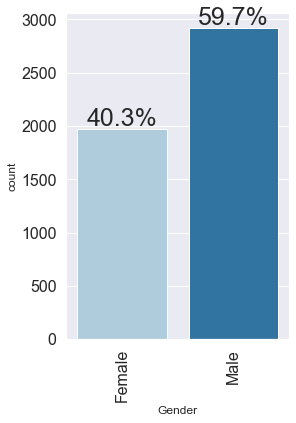

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Gender", 1, perc=True)

- 40.3% of the customers are Female
- 59.7% of the customers are Male

#### Observation on NumberOfPersonVisiting

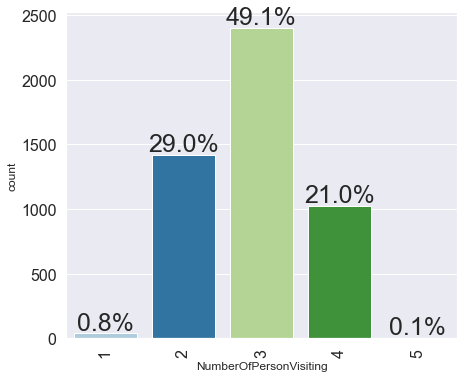

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "NumberOfPersonVisiting", 1, perc=True)

- 0.8% have only one person planning to take the trip with the customer
- 29.0% have two persons planning to take the trip with the customer
- 49.1% have three persons planning to take the trip with the customer
- 21.0% have four persons planning to take the trip with the customer
- 0.1% have five persons planning to take the trip with the customer

#### Observation on NumberOfFollowups

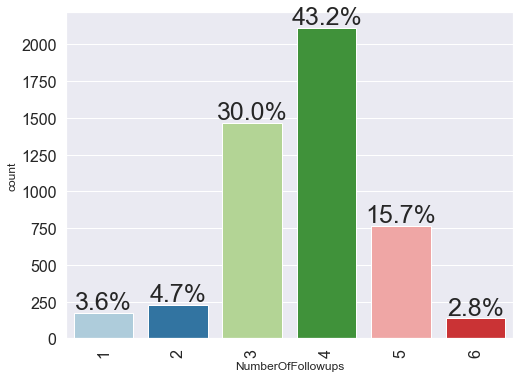

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "NumberOfFollowups", 1, perc=True)

- 3.6% of the customers had one follow-up done by the salesperson after the sales pitch
- 4.7% of the customers had two follow-ups done by the salesperson after the sales pitch
- 30.0% of the customers had three follow-ups done by the salesperson after the sales pitch
- 43.2% of the customers had four follow-ups done by the salesperson after the sales pitch
- 15.7% of the customers had five follow-ups done by the salesperson after the sales pitch
- 2.8% of the customers had six follow-ups done by the salesperson after the sales pitch

#### Observation on ProductPitched

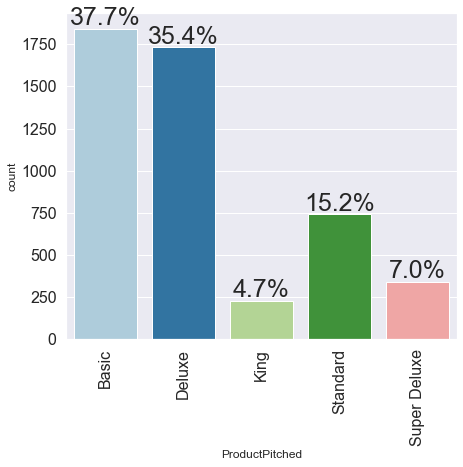

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "ProductPitched", 1, perc=True)

- 37.7% of the Basic product was pitched by the salesperson
- 35.4% of the Deluxe product was pitched by the salesperson
- 4.7% of the King product was pitched by the salesperson
- 15.2% of the Standard product was pitched by the salesperson
- 7.0% of the Super Deluxe product was pitched by the salesperson

#### Observation on PreferredPropertyStar

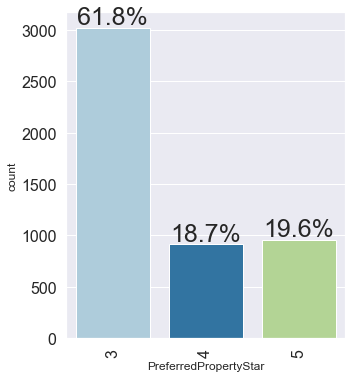

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "PreferredPropertyStar", 1, perc=True)

- 61.8% of the customers preferred hotel property rating of 3 stars
- 18.7% of the customers preferred hotel property rating of 4 stars
- 19.6% of the customers preferred hotel property rating of 5 stars

#### Observation on MaritalStatus

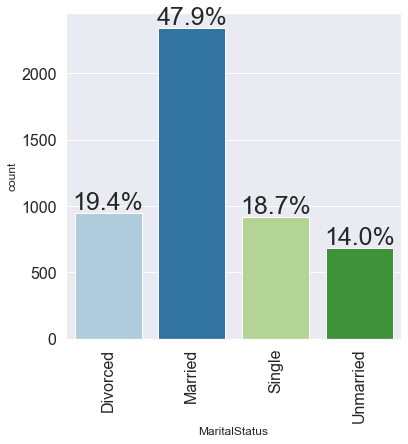

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "MaritalStatus", 1, perc=True)

- 19.4% of the customers have a Marital status of Divorced
- 47.9% of the customers have a Marital status of Married
- 18.7% of the customers have a Marital status of Single
- 14.0% of the customers have a Marital status of Unmarried

#### Observation on NumberOfTrips

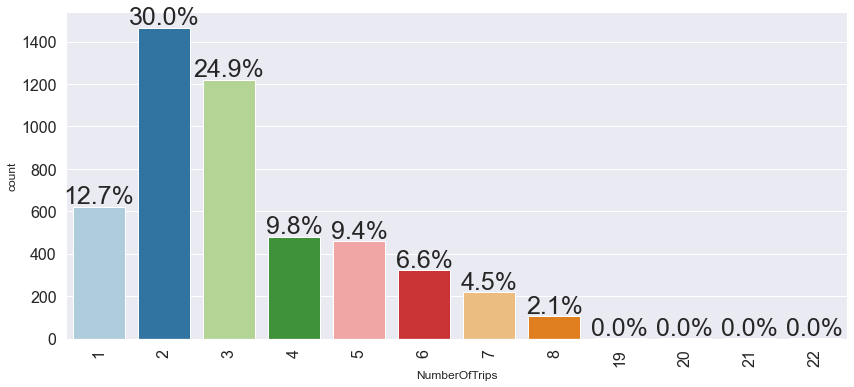

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "NumberOfTrips", 1, perc=True)

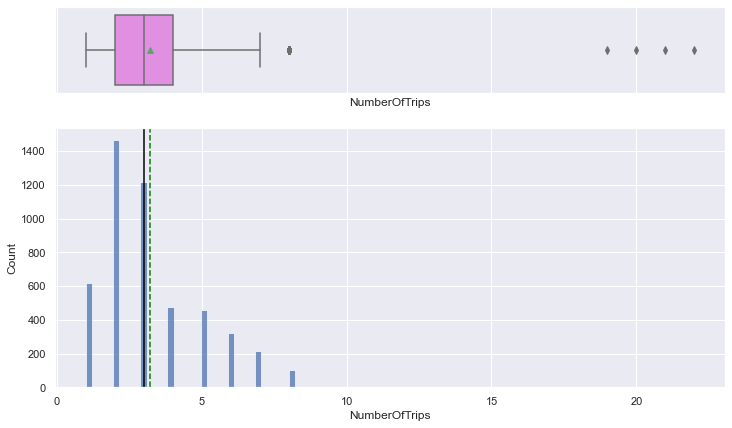

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "NumberOfTrips")

- The Histogram shows the Number of Trips by customer is right skewed
- The IQR is between 2 and 4 Number of Trips by customer with a mean of 3.2
- There is some outliers with Number of Trips by customer of 7 or more

#### Observation on Passport

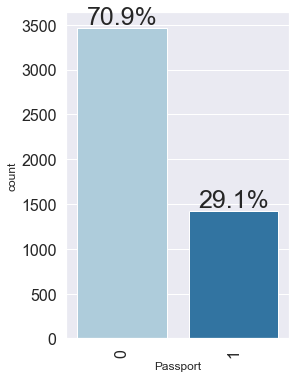

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "Passport", 1, perc=True)

- 70.9% of the customers do not have a passport
- 29.1% of the customers do have a passport

#### Observation on PitchSatisfactionScore

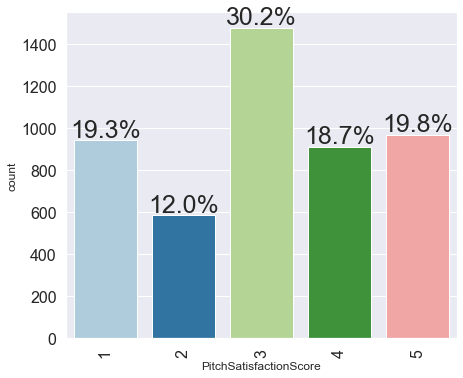

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "PitchSatisfactionScore", 1, perc=True)

- 19.3% of the customers gave a sales pitch satisfaction score of 1 out of 5 rating
- 12.0% of the customers gave a sales pitch satisfaction score of 2 out of 5 rating
- 30.2% of the customers gave a sales pitch satisfaction score of 3 out of 5 rating
- 18.7% of the customers gave a sales pitch satisfaction score of 4 out of 5 rating
- 19.8% of the customers gave a sales pitch satisfaction score of 5 out of 5 rating

#### Observation on OwnCar

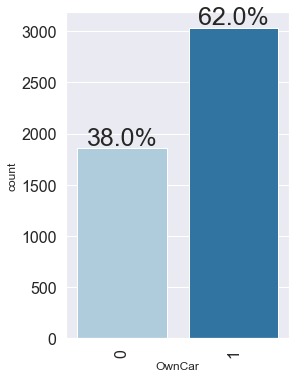

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "OwnCar", 1, perc=True)

- 38.0% of the customers do not own a car
- 62.0% of the customers do own a car

#### Observation on NumberOfChildrenVisiting

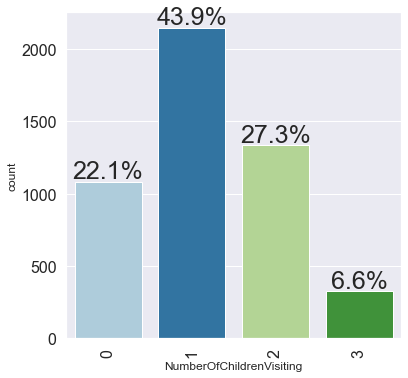

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "NumberOfChildrenVisiting", 1, perc=True)

- 22.1% of the customers will not plan on have children ages less than 5 take the trip with them
- 43.9% of the customers will plan on have one children ages less than 5 take the trip with them
- 27.3% of the customers will plan on have two children ages less than 5 take the trip with them
- 6.6% of the customers will plan on have three children ages less than 5 take the trip with them

#### Observation on Designation

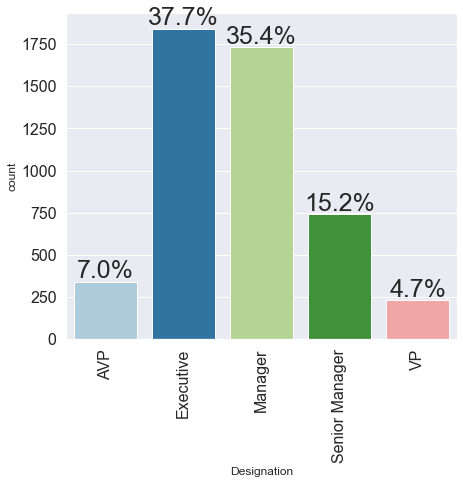

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(data, "Designation", 1, perc=True)

- 7.0% of the customers have a designation of "AVP" in the current organization
- 37.7% of the customers have a designation of "Executive" in the current organization
- 35.4% of the customers have a designation of "Manager" in the current organization
- 15.2% of the customers have a designation of "Senior Manager" in the current organization
- 4.7% of the customers have a designation of "VP" in the current organization

#### Observation on MonthlyIncome

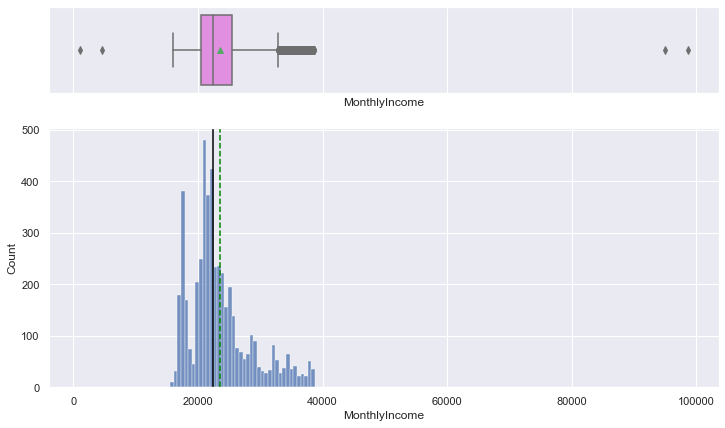

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data, "MonthlyIncome")

- The Histogram shows the Monthly Income is right skewed
- The IQR is between 20,300 and 25,600 Monthly Income with a mean of 23,600
- There is some outliers with Monthly Income of 16,000 or less and 33,000 or more

### Bivariate Analysis

In [40]:
# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot stripplot chart
def stripplot_chart(data_chart, x_axis, y_axis, hue_chart):
    plt.figure(figsize=(40, 20))
    sns.stripplot(data=data_chart, x=x_axis, y=y_axis, hue=hue_chart, jitter=True)
    plt.xticks(rotation=90, fontsize=50)
    plt.yticks(fontsize=40)
    plt.ylabel(y_axis, fontsize=50)
    plt.legend(loc="upper left", prop={"size": 20}, bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

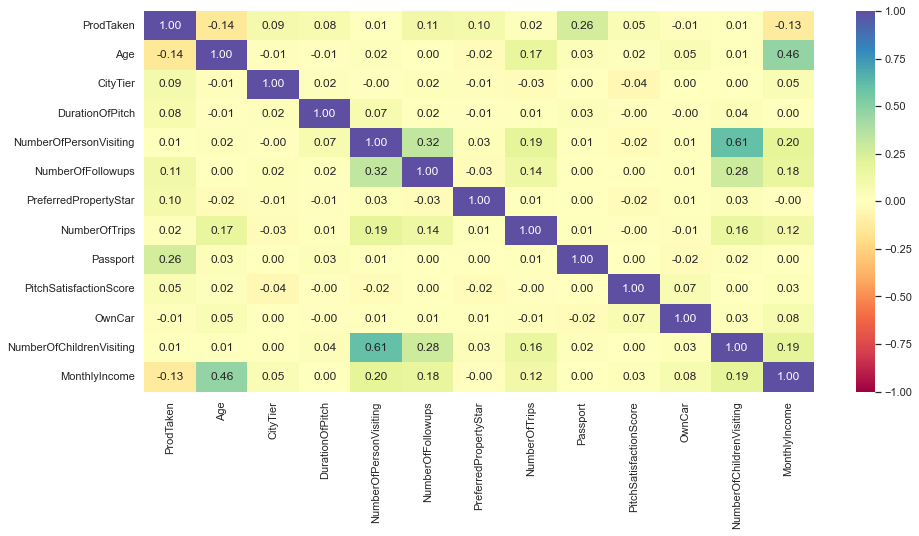

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a positive correlation between NumberOfPersonVisiting and NumberOfChildrenVisiting
- There is a positive correlation between NumberOfPersonVisiting and NumberOfFollowups
- There is a positive correlation between Age and MonthlyIncome
- There is a small positive correlation between ProdTaken and Passport
- There is a small positive correlation between NumberOfPersonVisiting and MonthlyIncome
- There is a small positive correlation between NumberOfChildrenVisiting and MonthlyIncome
- There is a small positive correlation between NumberOfFollowups and NumberOfChildrenVisiting
- There is a small positive correlation between NumberOfFollowups and MonthlyIncome
- There is a small positive correlation between Age and NumberOfTrips
- There is a small positive correlation between NumberOfPersonVisiting and NumberOfTrips
- There is a small positive correlation between NumberOfChildrenVisiting and NumberOfTrips
- There is a small positive correlation between NumberOfTrips and MonthlyIncome
- There is a small positive correlation between NumberOfTrips and NumberOfFollowups
- There is a small negative correlation between ProdTaken and MonthlyIncome
- There is a small negative correlation between ProdTaken and Age

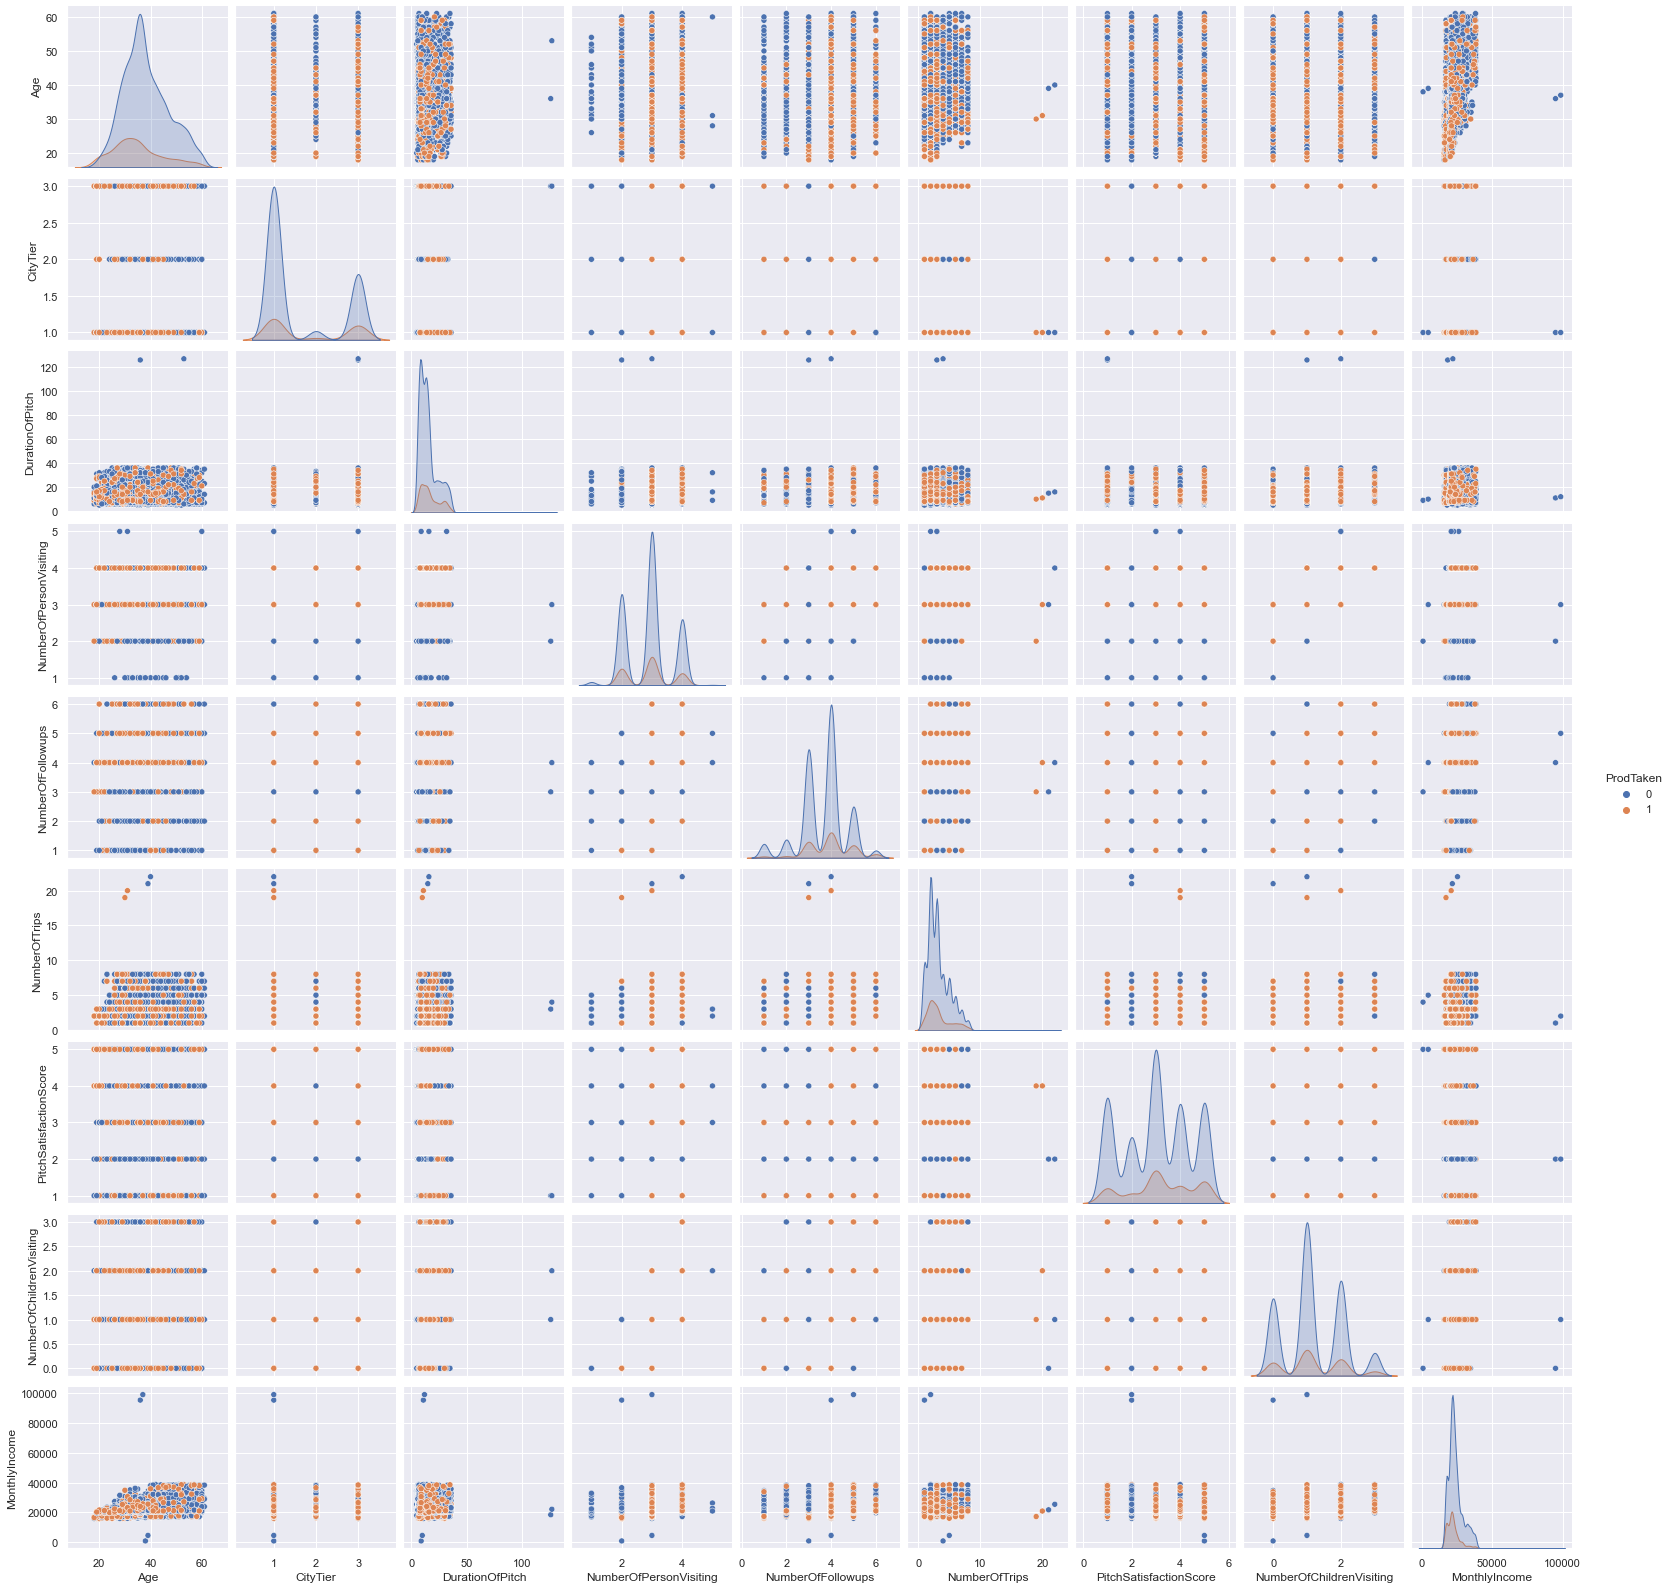

<IPython.core.display.Javascript object>

In [42]:
sns.pairplot(
    data=data.drop(["Passport", "PreferredPropertyStar", "OwnCar"], axis=1),
    hue="ProdTaken",
    diag_kind="kde",
)
plt.show()

- Older customers did not take trip compared to younger customers, especially City Tier 2
- The longer Duration of Pitch the customer did not take trip
- Number of person visiting of 3 or 4 are more likely to take trip
- The more Followups with customer the more likely customer will take trip
- Pitch Satisfaction score of 2 the customer did not take trip


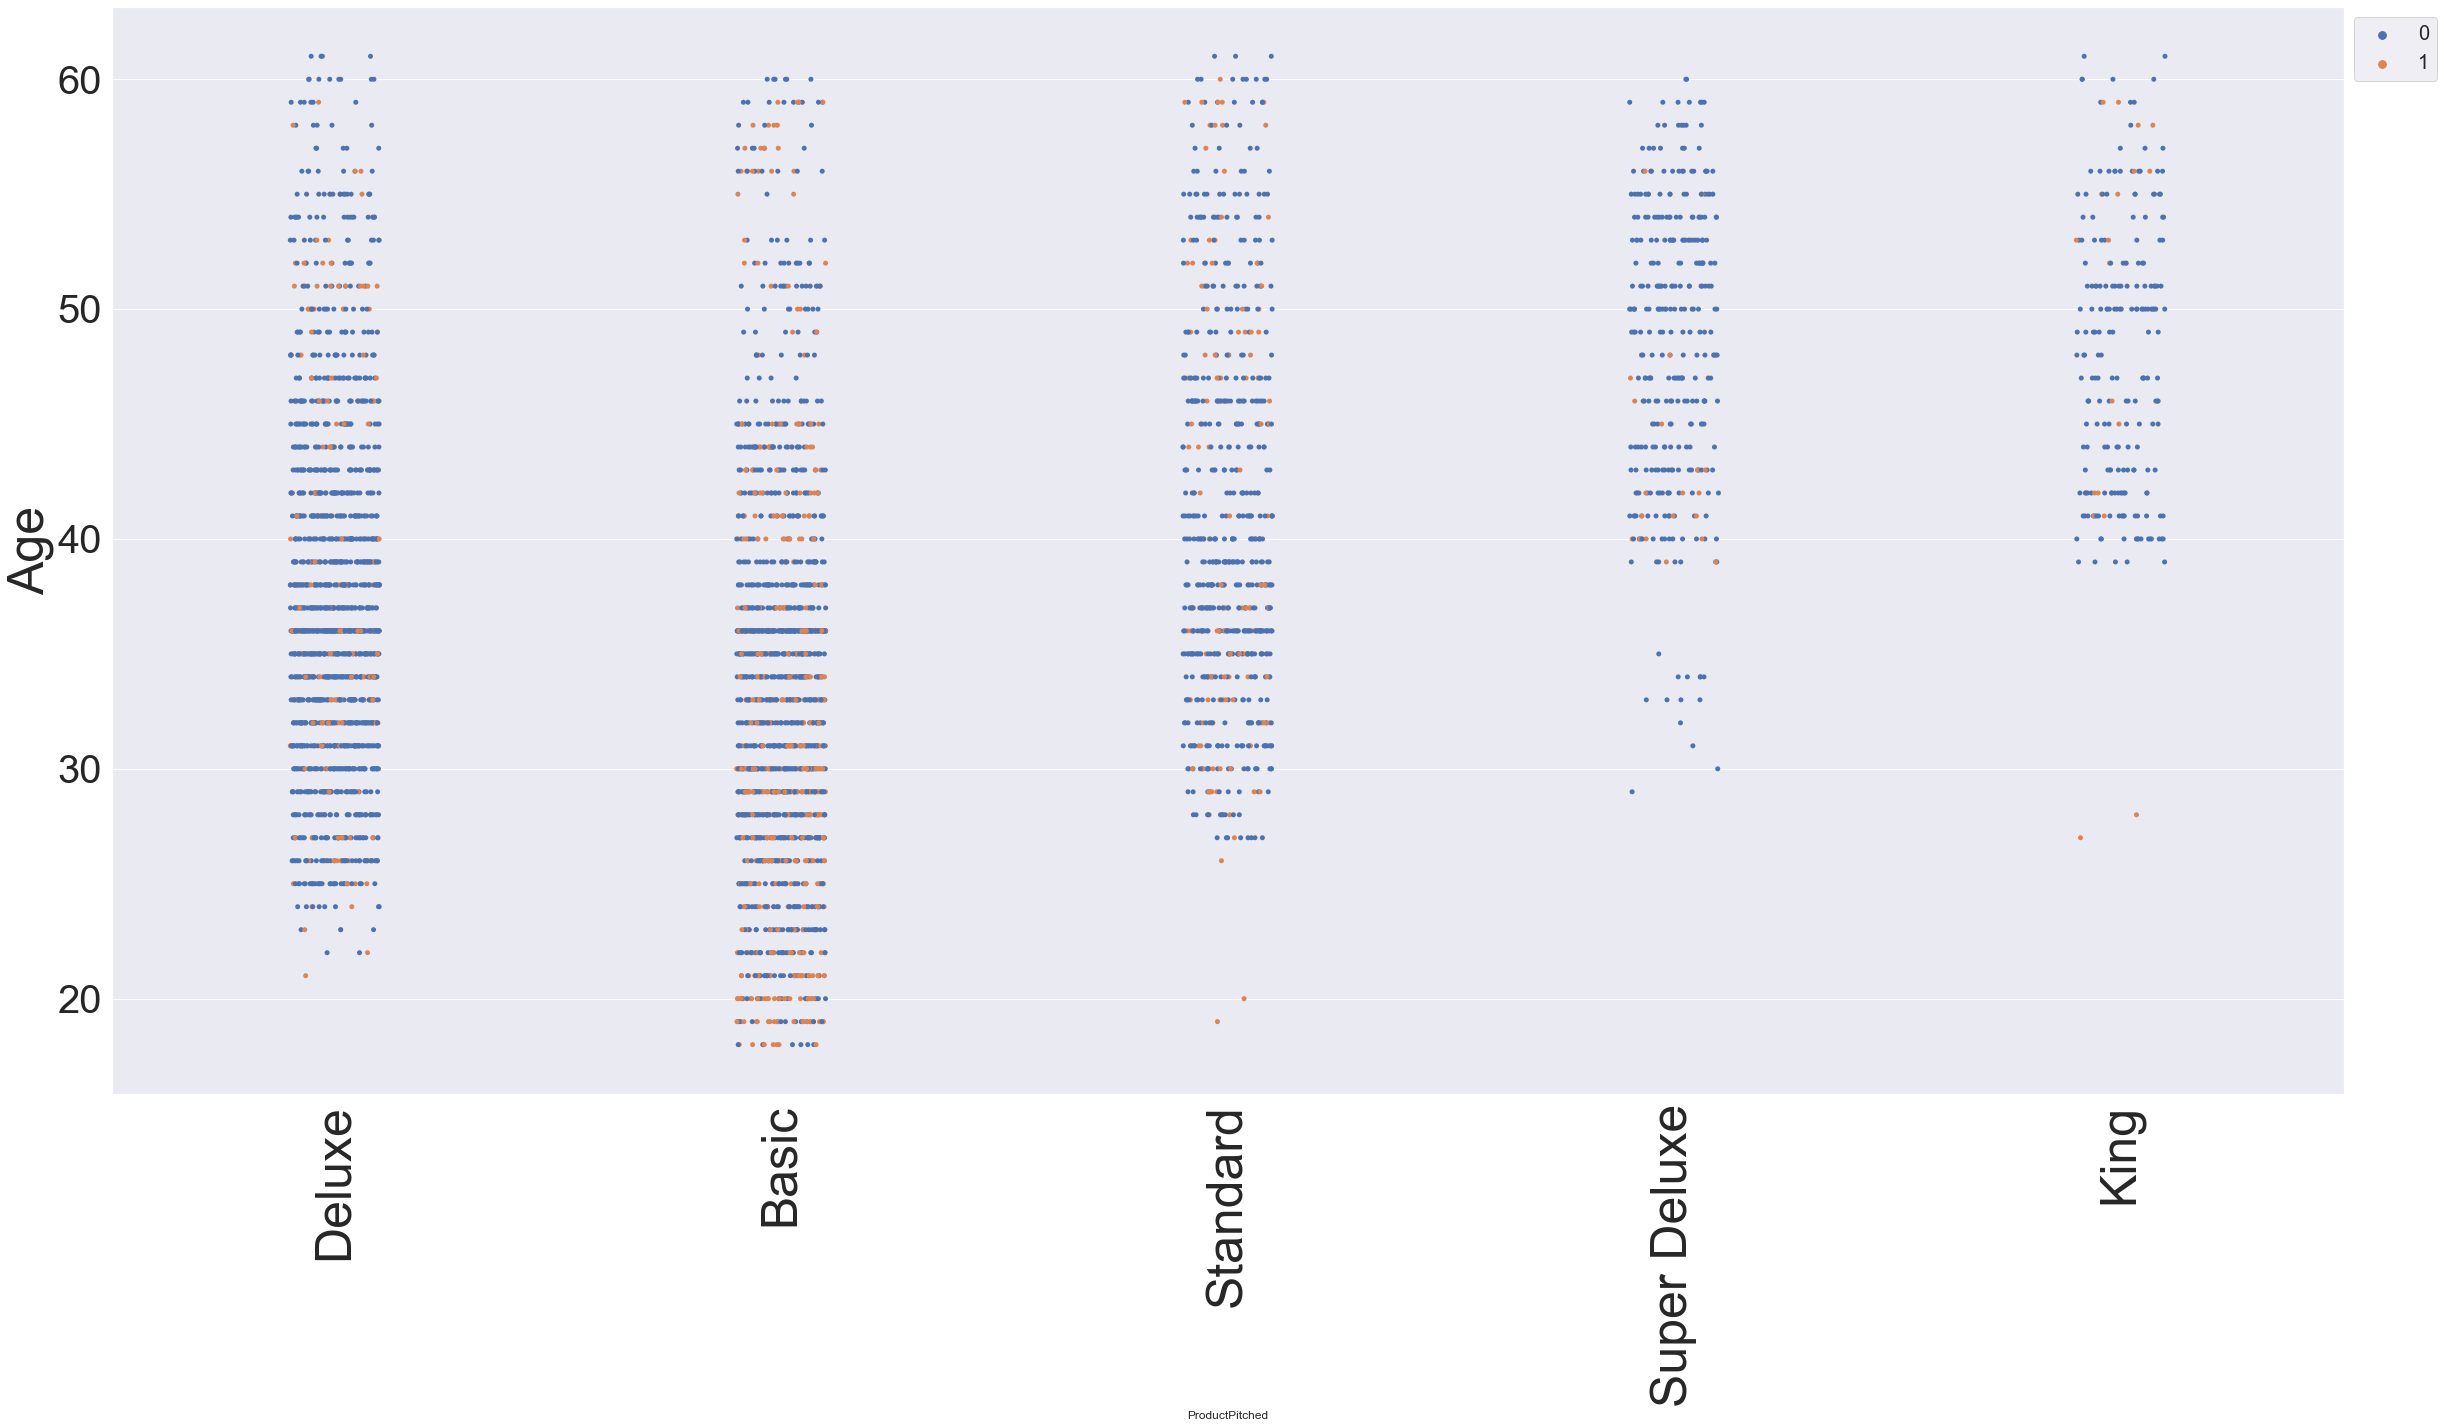

<IPython.core.display.Javascript object>

In [43]:
stripplot_chart(data, "ProductPitched", "Age", "ProdTaken")

- The most pitched and Tourism Package product taken is the Basic Package for all ages
- The Super Deluxe and King Tourism Package is the least pitched and product taken

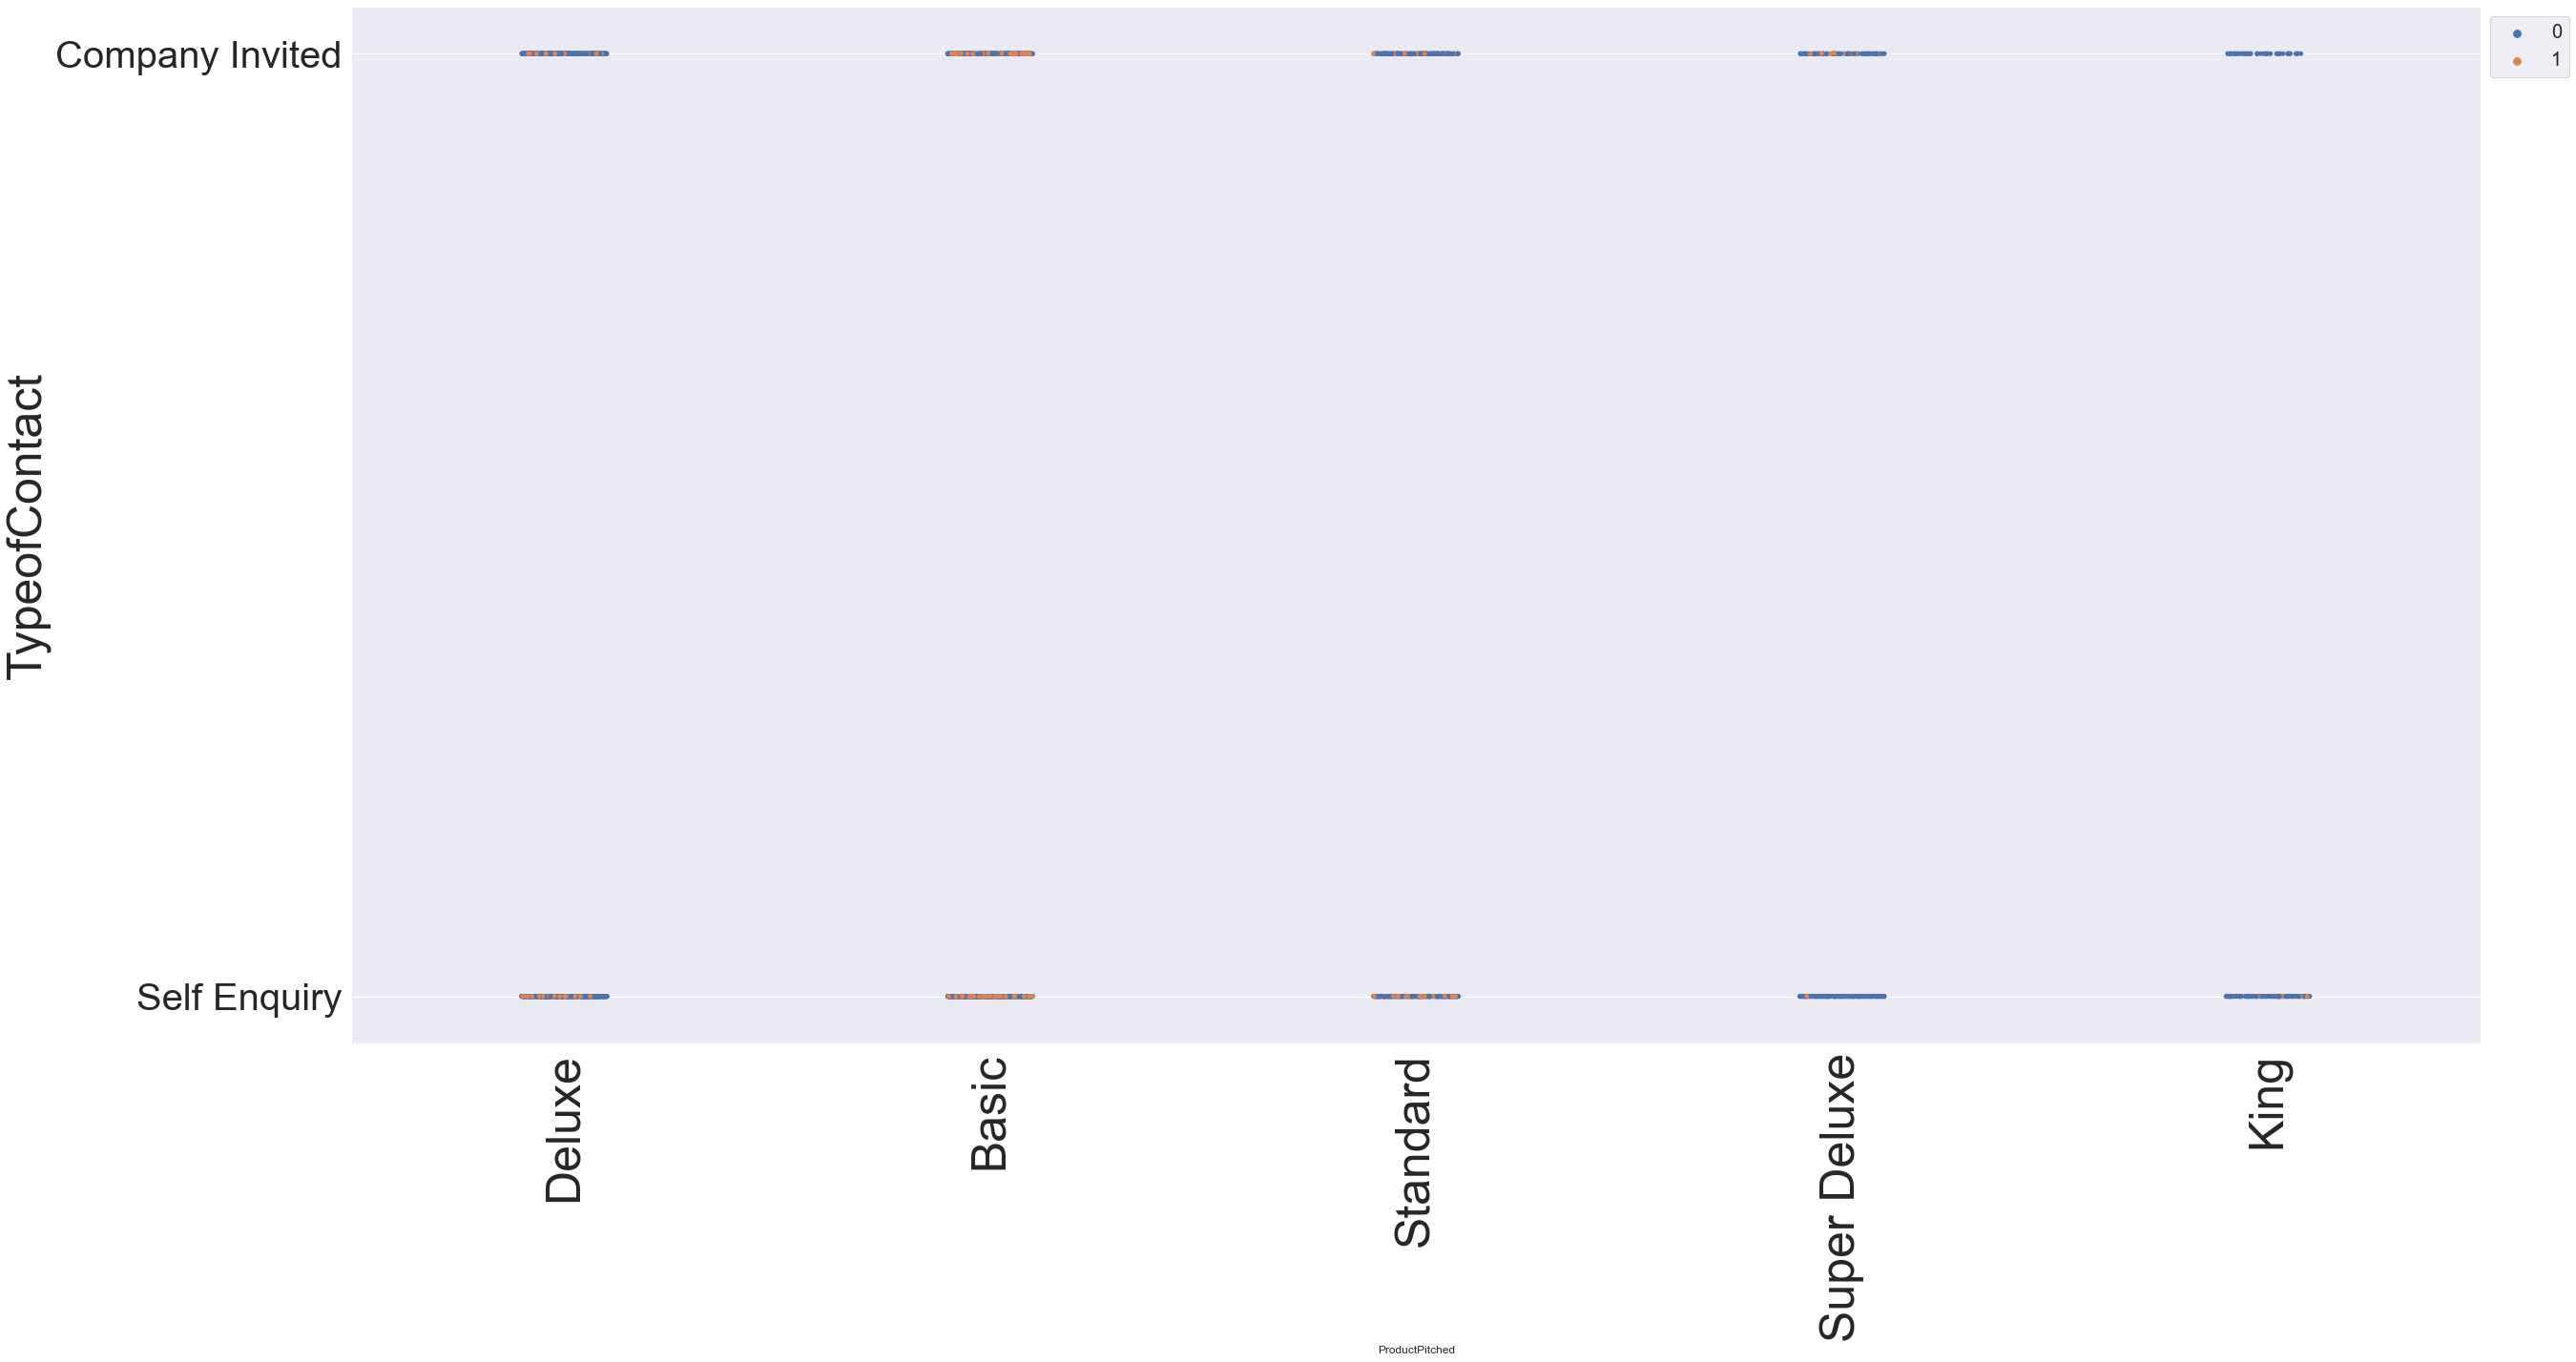

<IPython.core.display.Javascript object>

In [44]:
stripplot_chart(data, "ProductPitched", "TypeofContact", "ProdTaken")

- The most popular Tourism Package for both "Self Enquiry" and "Company Invited" is the Basic Package

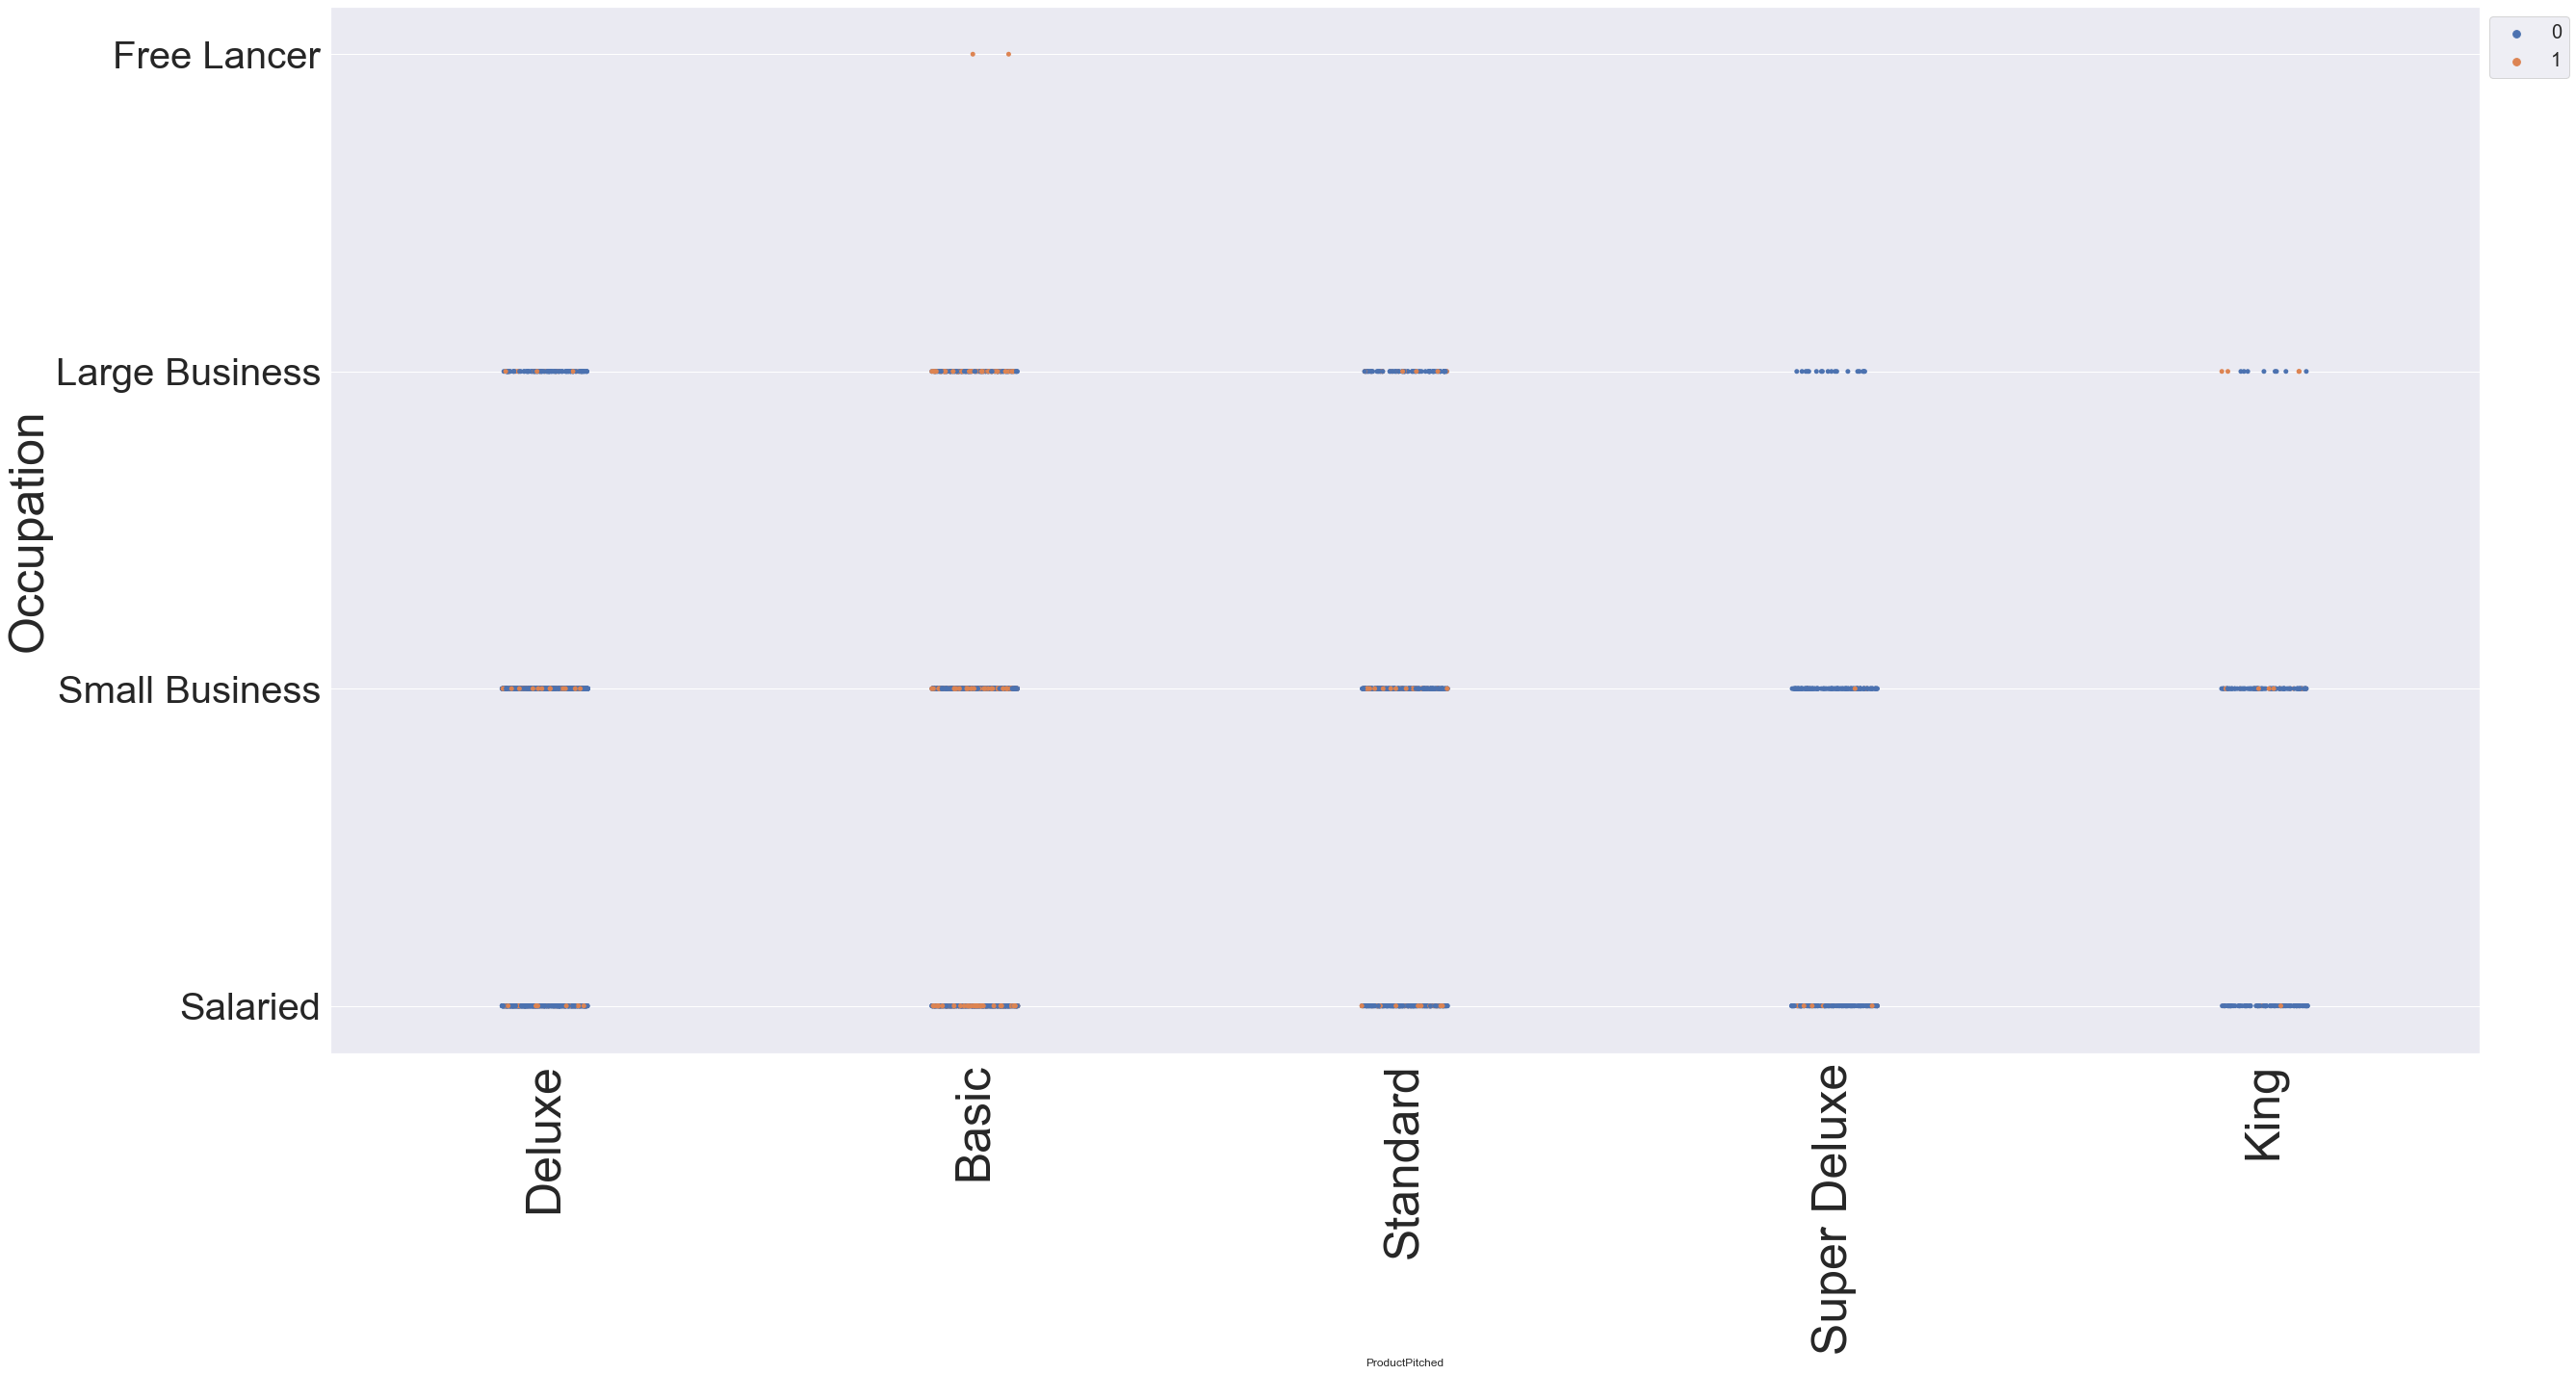

<IPython.core.display.Javascript object>

In [45]:
stripplot_chart(data, "ProductPitched", "Occupation", "ProdTaken")

- Free Lancer Occupation will more than likely take the Basic Tourism Package
- Small Business and Salaried occupation are more likely to take the Super Deluxe and King Tourism Packages compared to Large Business and FreeLancer occupations

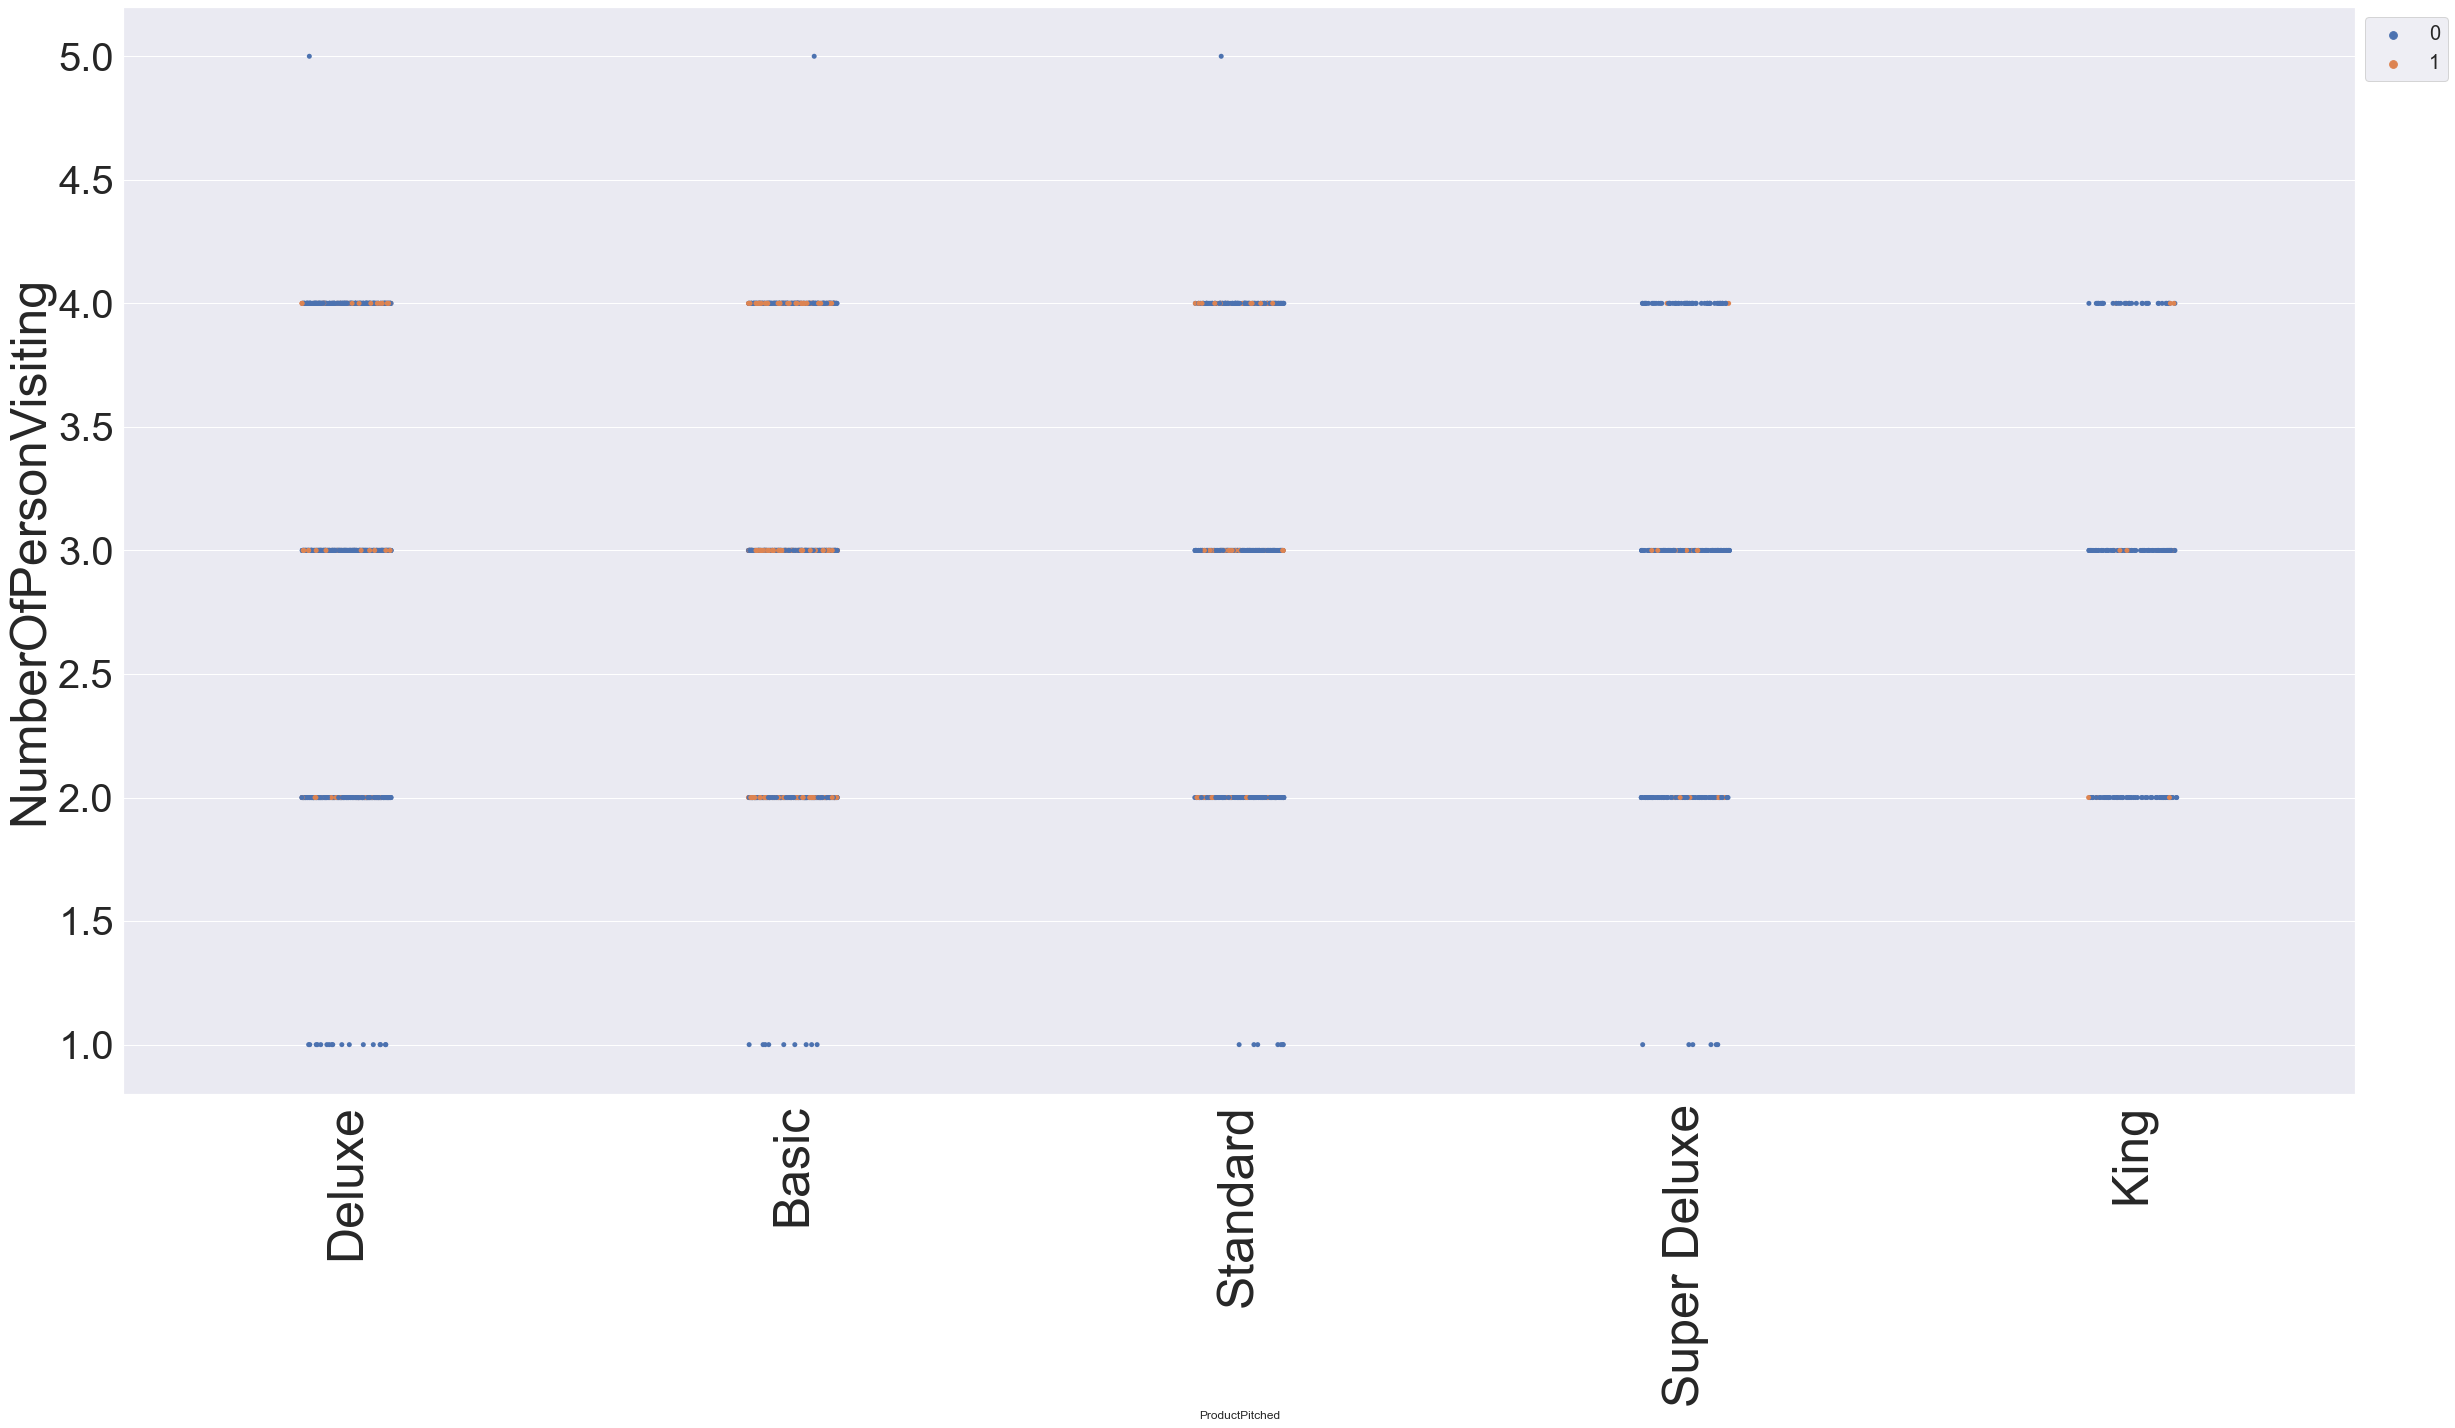

<IPython.core.display.Javascript object>

In [46]:
stripplot_chart(data, "ProductPitched", "NumberOfPersonVisiting", "ProdTaken")

- If there is only one person visiting the customer will more than likely not take any Tourism Package

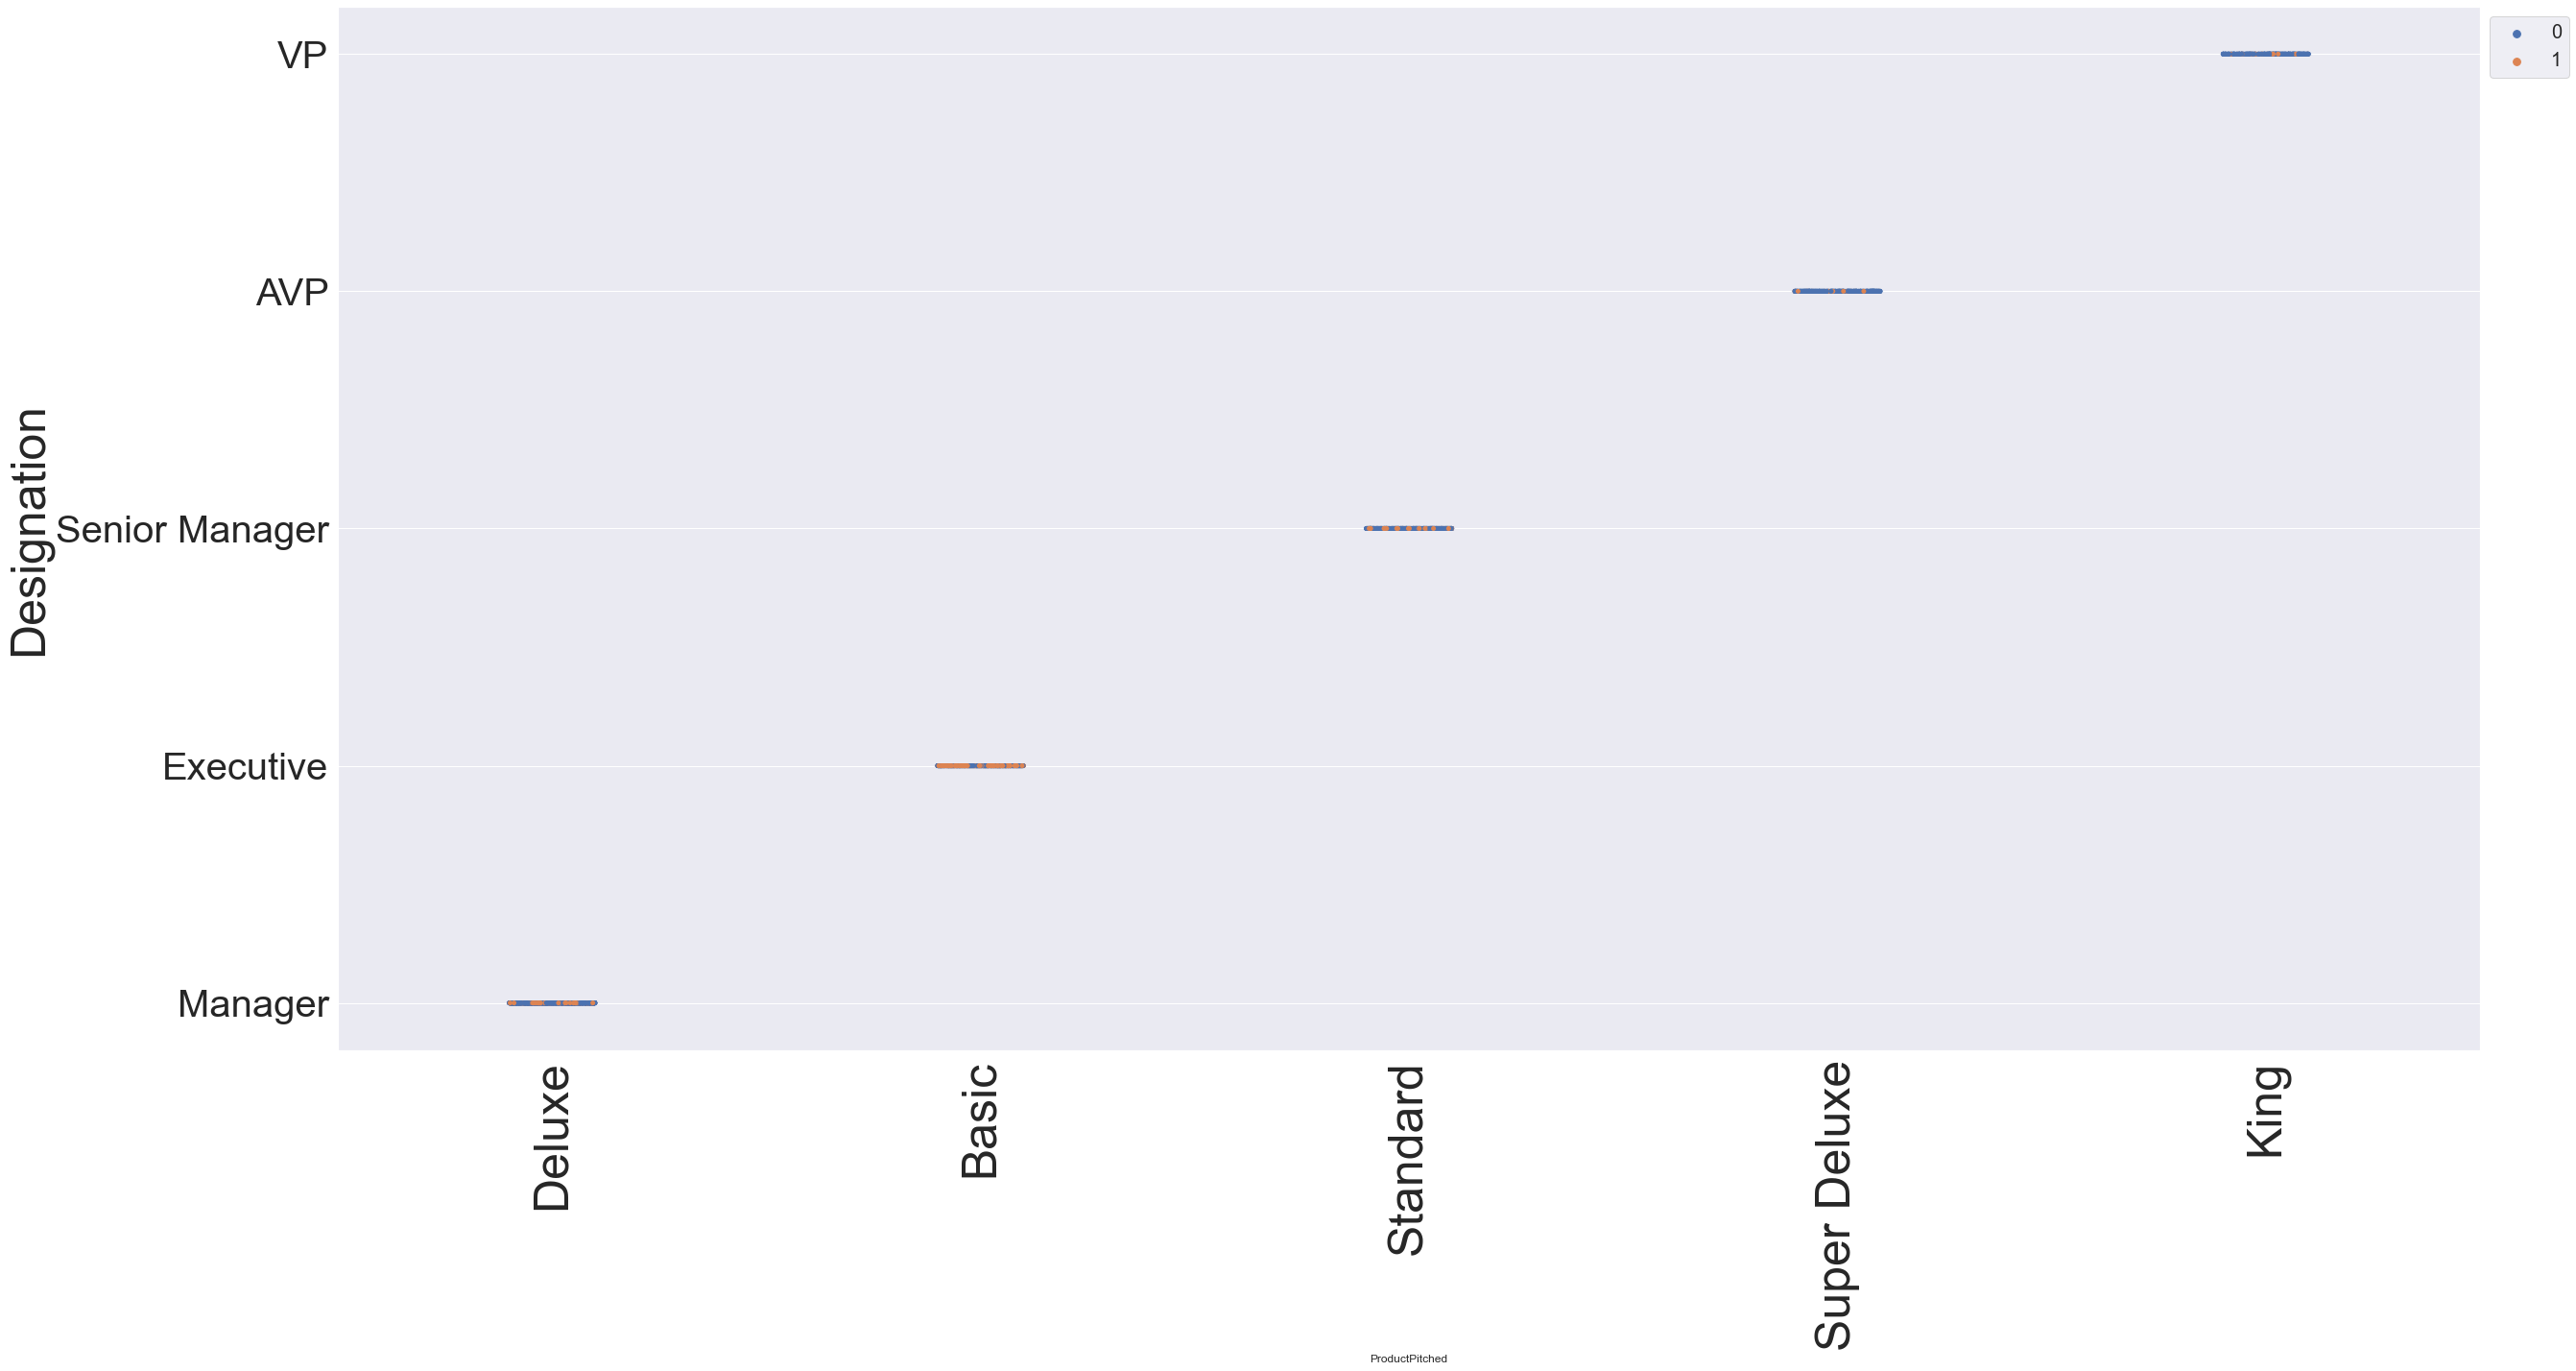

<IPython.core.display.Javascript object>

In [47]:
stripplot_chart(data, "ProductPitched", "Designation", "ProdTaken")

- VP are pitched the King Tourism Package
- AVP are pitched the Super Deluxe Tourism Package
- Senior Manager are pitched the Standard Tourism Package
- Executive are pitched the Basic Tourism Package
- Manager are pitched the Deluxe Tourism Package

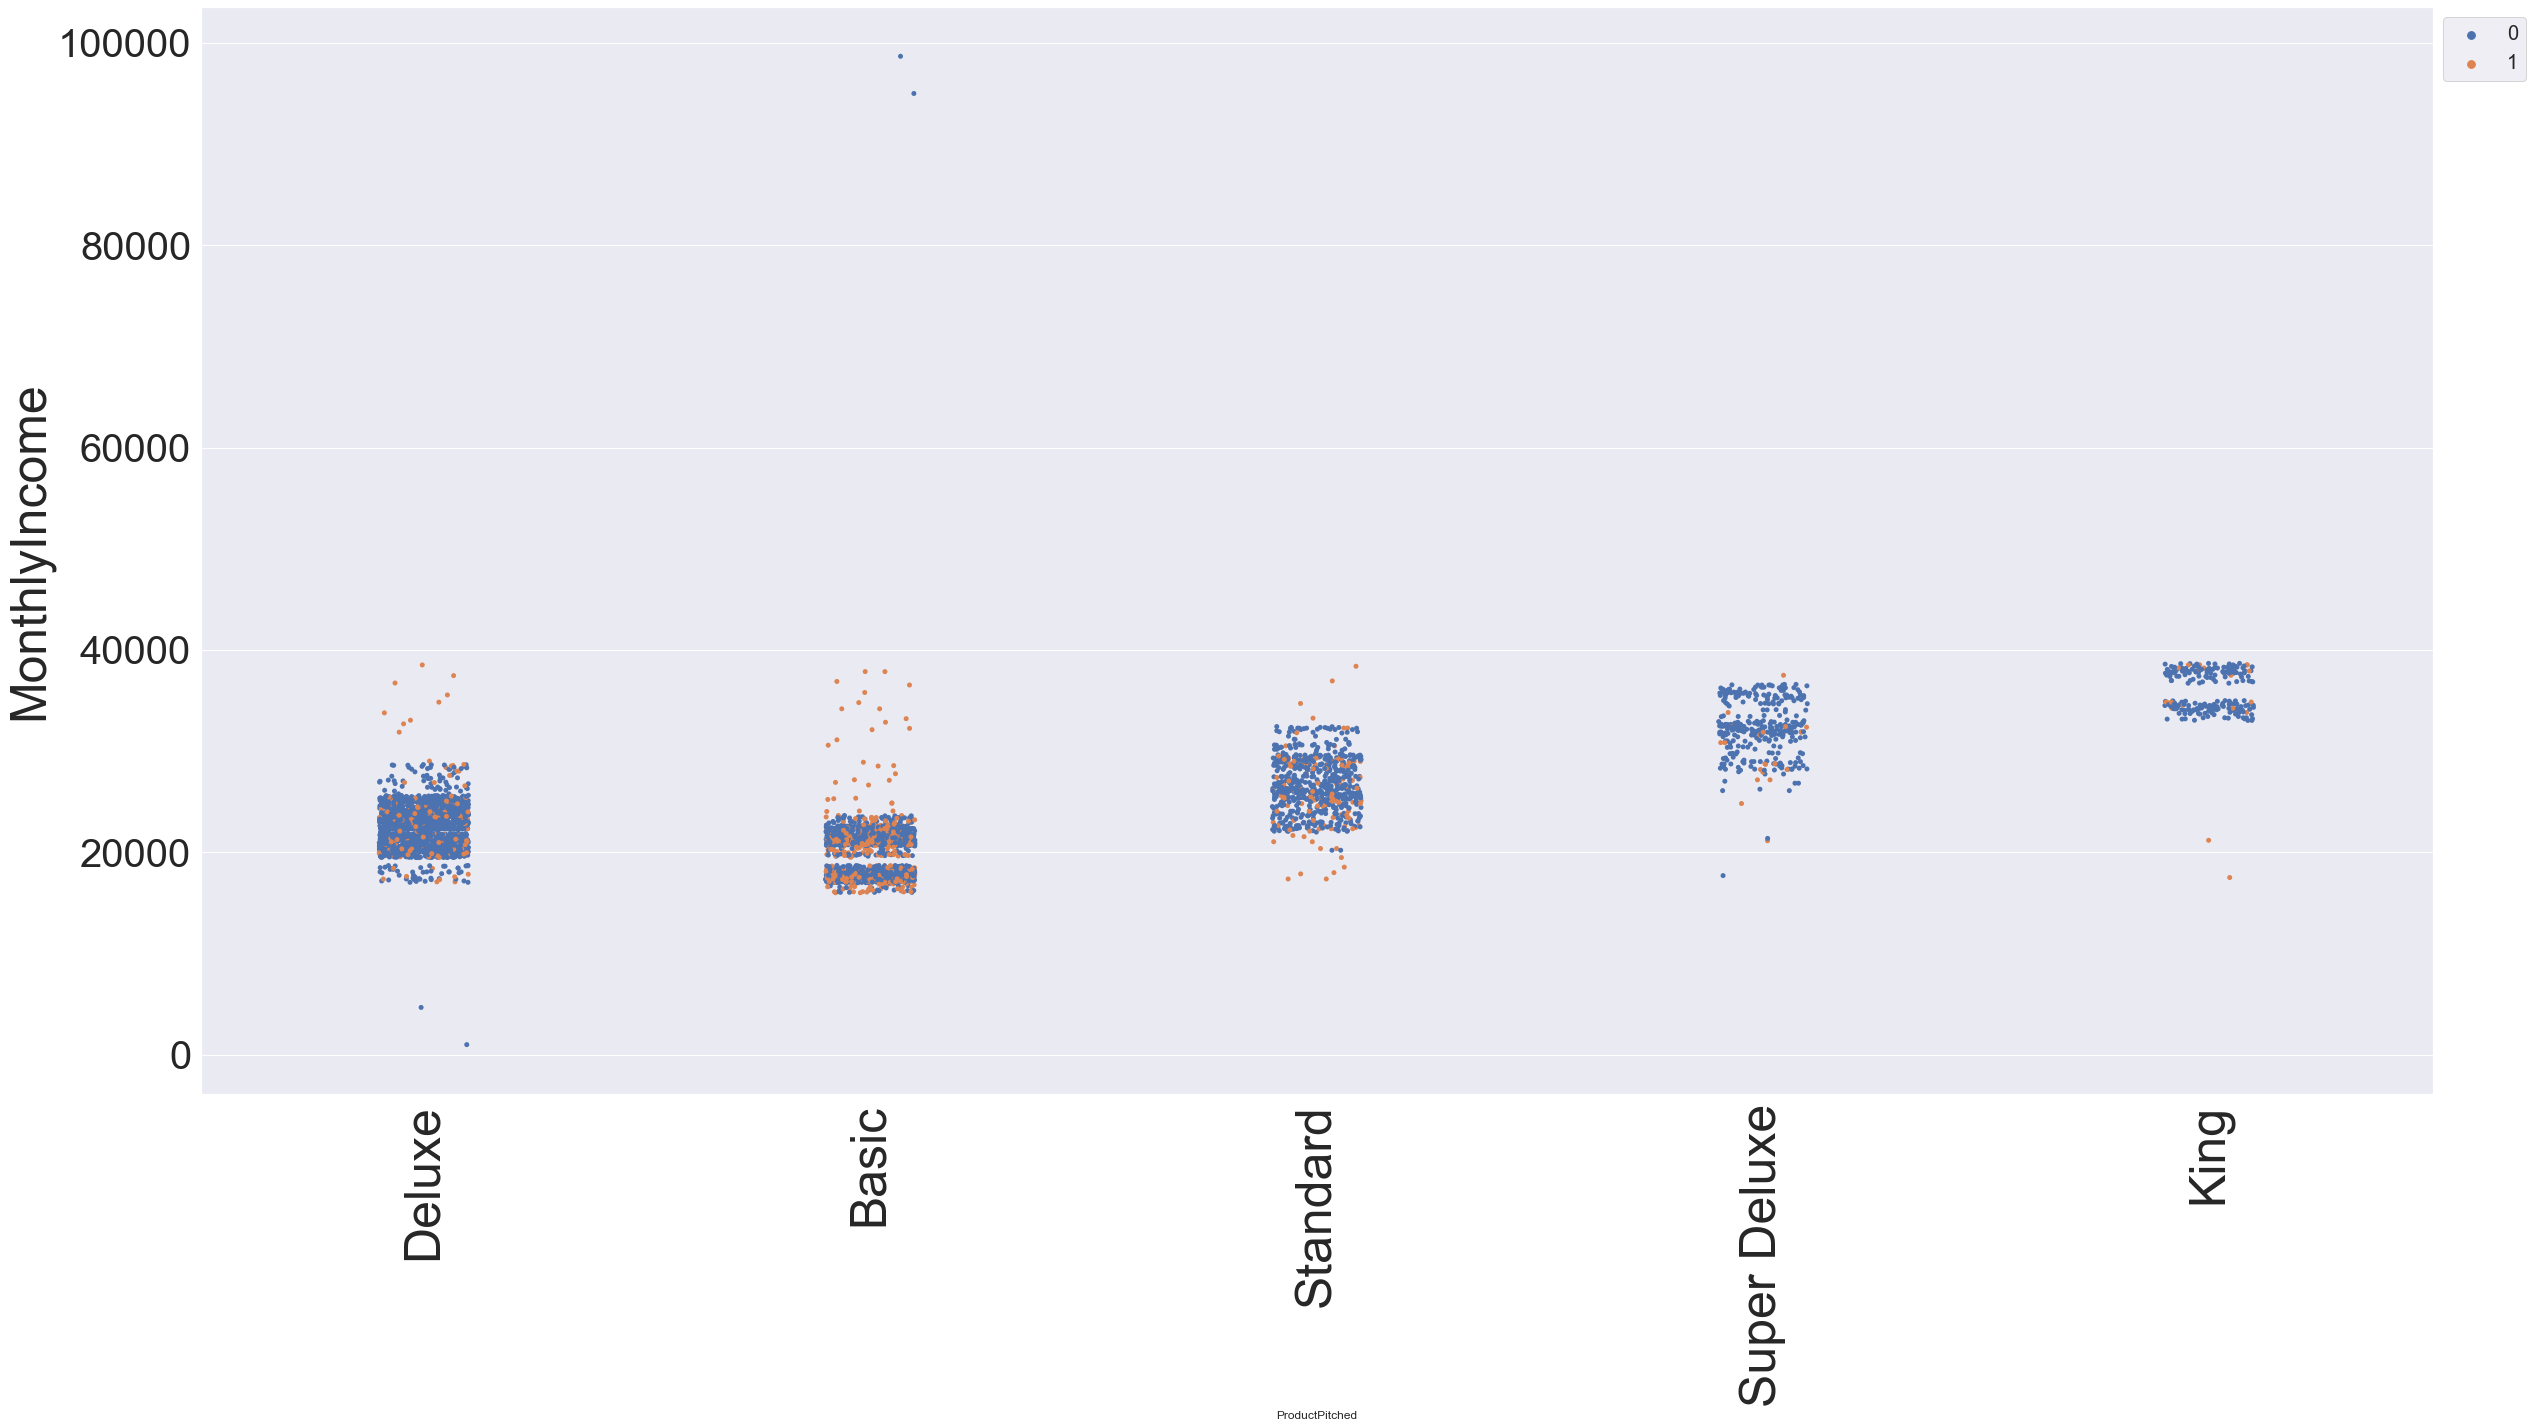

<IPython.core.display.Javascript object>

In [48]:
stripplot_chart(data, "ProductPitched", "MonthlyIncome", "ProdTaken")

- Basic Tourism Package is still the most popular package even for high monthly income customers
- Lower monthly income customers are pitched Basic Tourism Package
- Higher monthly income customers are pitched Super Deluxe and King Tourism Package

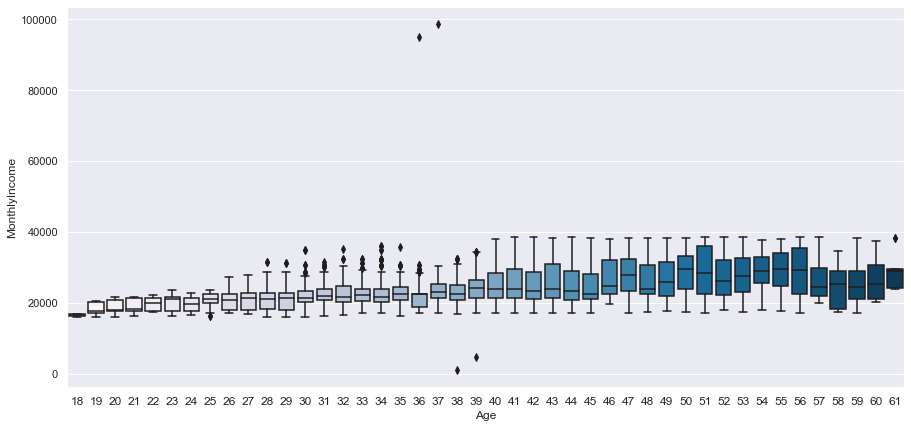

<IPython.core.display.Javascript object>

In [49]:
boxplot_chart(data, "Age", "MonthlyIncome")

- There is some outliers in monthly income in the 30s age group

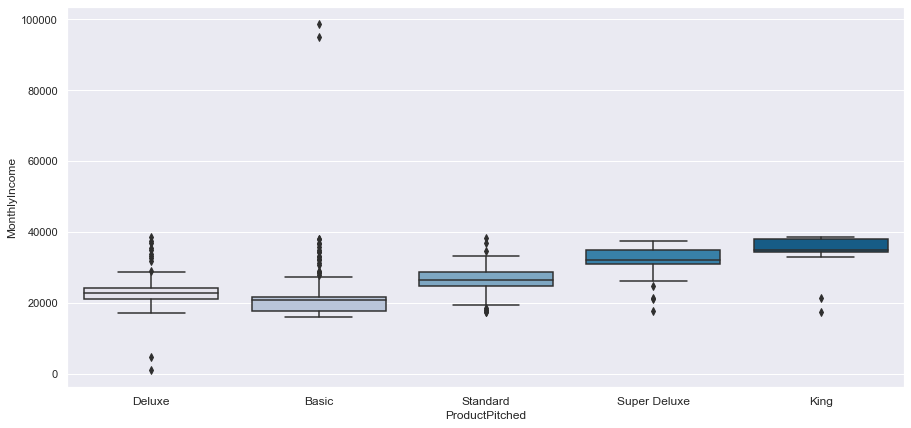

<IPython.core.display.Javascript object>

In [50]:
boxplot_chart(data, "ProductPitched", "MonthlyIncome")

- Tourism Package pitched is based on monthly income of customer(Basic, Deluxe, Standard, Super Deluxe, and King in that order)
- Monthly income of 15,000-22,000 are pitched the Basic Tourism Package
- Monthly income of 21,000-25,000 are pitched the Deluxe Tourism Package
- Monthly income of 24,000-30,000 are pitched the Standard Tourism Package
- Monthly income of 30,000-35,000 are pitched the Super Deluxe Tourism Package
- Monthly income of 34,000-40,000 are pitched the King Tourism Package

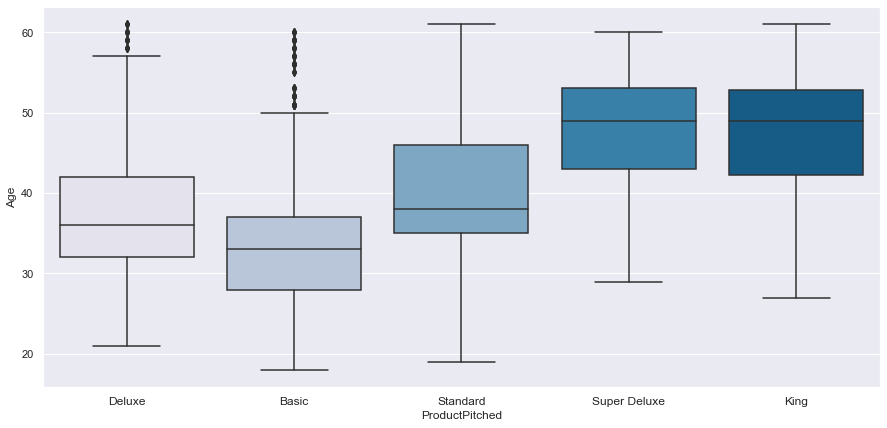

<IPython.core.display.Javascript object>

In [51]:
boxplot_chart(data, "ProductPitched", "Age")

- Tourism Package pitched is also based on Age of customer(Basic, Deluxe, Standard, Super Deluxe, and King in that order)
- Age 18-36 are pitched Basic Tourism Package
- Age 32-42 are pitched Deluxe Tourism Package
- Age 35-46 are pitched Standard Tourism Package
- Age 43-60 are pitched Super Deluxe Tourism Package
- Age 42-61 are pitched King Tourism Package

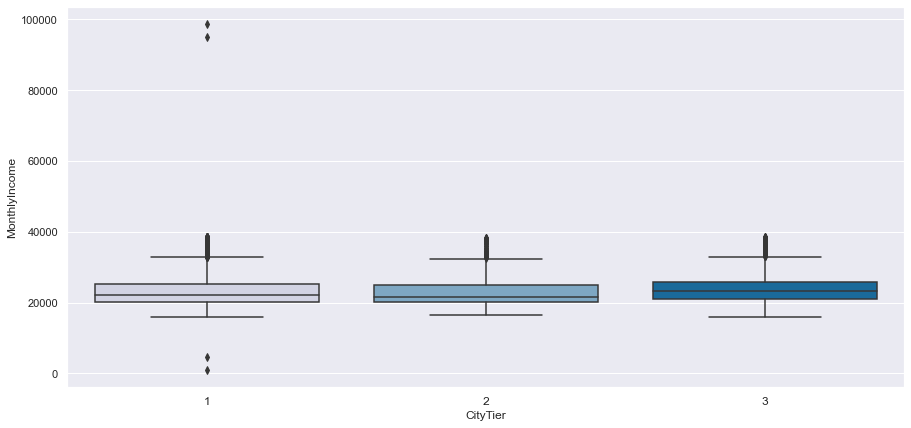

<IPython.core.display.Javascript object>

In [52]:
boxplot_chart(data, "CityTier", "MonthlyIncome")

- City Tier 1 has more outliers in monthly income compared to City Tier 2 and 3

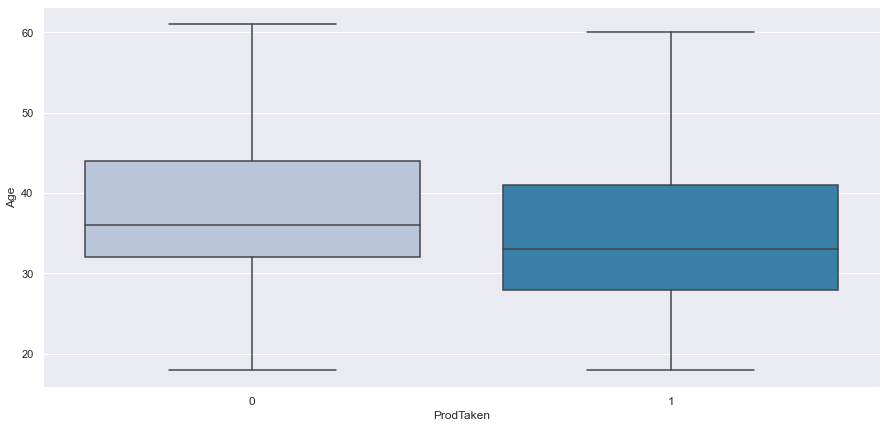

<IPython.core.display.Javascript object>

In [53]:
boxplot_chart(data, "ProdTaken", "Age")

- Younger age group customers are more likely to take Tourism Package than older age group

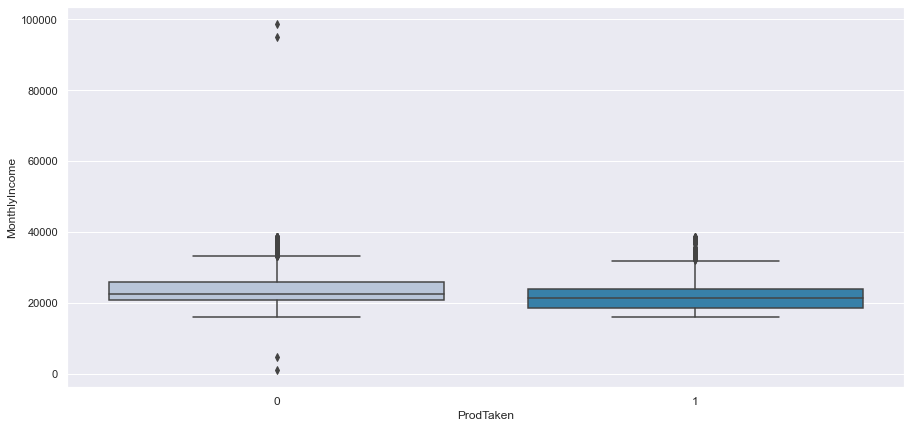

<IPython.core.display.Javascript object>

In [54]:
boxplot_chart(data, "ProdTaken", "MonthlyIncome")

- Lower monthly income customers are slightly more likely to take Tourism Package over higher monthly income customers

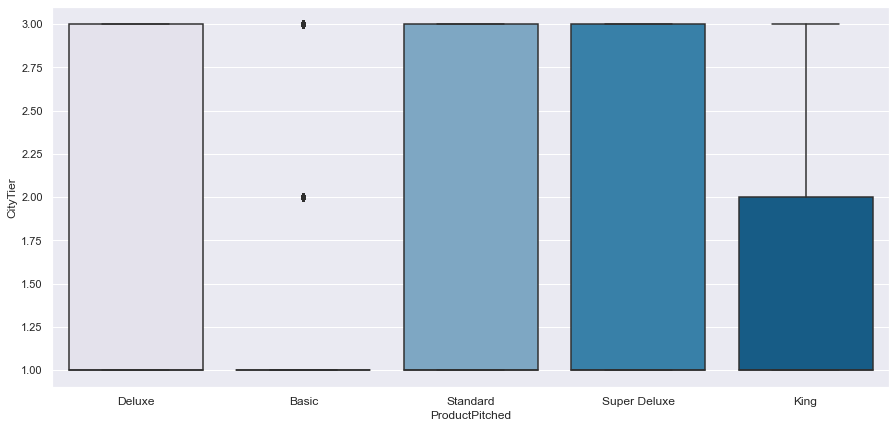

<IPython.core.display.Javascript object>

In [55]:
boxplot_chart(data, "ProductPitched", "CityTier")

- City Tier 2 and 3 is rarely pitched the Basic Tourism Package
- City Tier 3 is rarely pitched the King Tourism Package

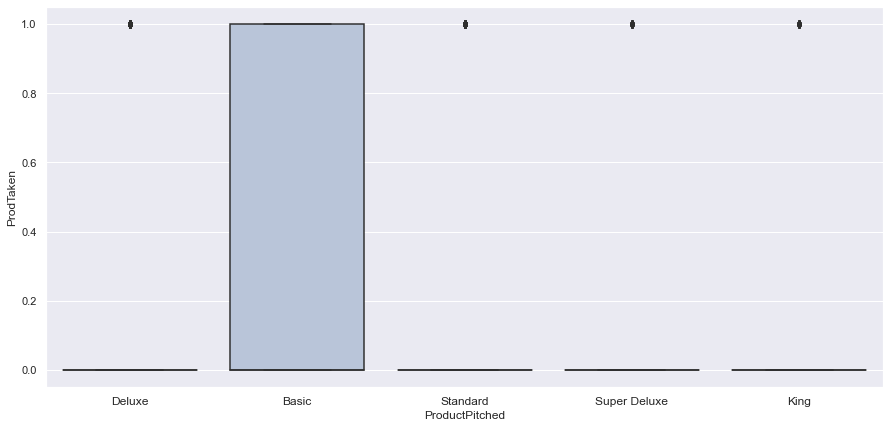

<IPython.core.display.Javascript object>

In [56]:
boxplot_chart(data, "ProductPitched", "ProdTaken")

- Basic Tourism Package is the most product taken

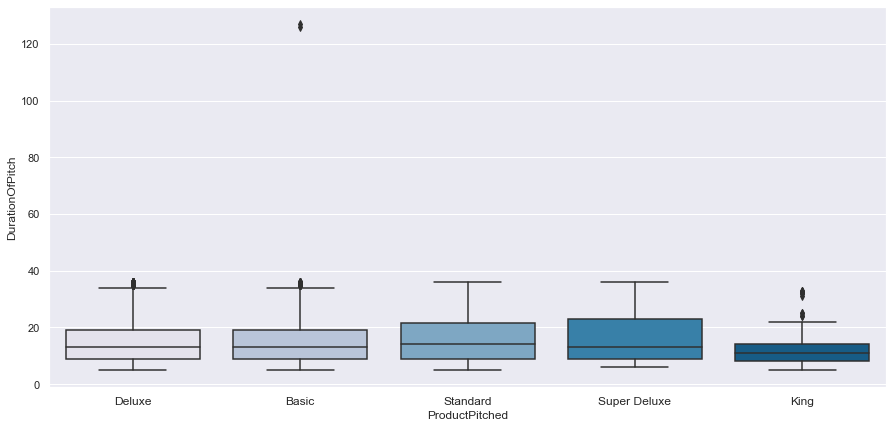

<IPython.core.display.Javascript object>

In [57]:
boxplot_chart(data, "ProductPitched", "DurationOfPitch")

- The duration of pitch is the shortest for the King Tourism Package

### Key observations on the relationship between variables:

- 81.2% of customers did not purchase a package from "Visit with us" travel company
- 18.8% of customers did purchase a package from "Visit with us" travel company
- The Median Age is 36 years old, youngest age is 18 and oldest is 61 years old
- The IQR is between age 31 and 44 with a mean of 37.6
- There is no outliers in age
- 29.0% of the customers was contacted by Company Invited
- 71.0% of the customers was contacted by Self Enquiry
- 65.3% of the customers live in Tier1 city
- 4.1% of the customers live in Tier2 city
- 30.7% of the customers live in Tier3 city
- Duration of Pitch by a salesperson to the customer ranges from 5 to 127
- The Histogram shows Duration of Pitch is right skewed
- The IQR is between 9 and 20 Duration of Pitch with a mean of 15.5
- There is some outliers with Duration of Pitch of 35 or more
- 0.0% of the customers Occupation is Free Lancers (only 2 customers are Free Lancers)
- 8.9% of the customers Occupation is Large Business
- 48.4% of the customers Occupation is Salaried
- 42.6% of the customers Occupation is Small Business
- 40.3% of the customers are Female
- 59.7% of the customers are Male
- 0.8% have only one person planning to take the trip with the customer
- 29.0% have two persons planning to take the trip with the customer
- 49.1% have three persons planning to take the trip with the customer
- 21.0% have four persons planning to take the trip with the customer
- 0.1% have five persons planning to take the trip with the customer
- 3.6% of the customers had one follow-up done by the salesperson after the sales pitch
- 4.7% of the customers had two follow-ups done by the salesperson after the sales pitch
- 30.0% of the customers had three follow-ups done by the salesperson after the sales pitch
- 43.2% of the customers had four follow-ups done by the salesperson after the sales pitch
- 15.7% of the customers had five follow-ups done by the salesperson after the sales pitch
- 2.8% of the customers had six follow-ups done by the salesperson after the sales pitch
- 37.7% of the Basic product was pitched by the salesperson
- 35.4% of the Deluxe product was pitched by the salesperson
- 4.7% of the King product was pitched by the salesperson
- 15.2% of the Standard product was pitched by the salesperson
- 7.0% of the Super Deluxe product was pitched by the salesperson
- 61.8% of the customers preferred hotel property rating of 3 stars
- 18.7% of the customers preferred hotel property rating of 4 stars
- 19.6% of the customers preferred hotel property rating of 5 stars
- 19.4% of the customers have a Marital status of Divorced
- 47.9% of the customers have a Marital status of Married
- 18.7% of the customers have a Marital status of Single
- 14.0% of the customers have a Marital status of Unmarried
- The Histogram shows the Number of Trips by customer is right skewed
- The IQR is between 2 and 4 Number of Trips by customer with a mean of 3.2
- There is some outliers with Number of Trips by customer of 7 or more
- 70.9% of the customers do not have a passport
- 29.1% of the customers do have a passport
- 19.3% of the customers gave a sales pitch satisfaction score of 1 out of 5 rating
- 12.0% of the customers gave a sales pitch satisfaction score of 2 out of 5 rating
- 30.2% of the customers gave a sales pitch satisfaction score of 3 out of 5 rating
- 18.7% of the customers gave a sales pitch satisfaction score of 4 out of 5 rating
- 19.8% of the customers gave a sales pitch satisfaction score of 5 out of 5 rating
- 38.0% of the customers do not own a car
- 62.0% of the customers do own a car
- 22.1% of the customers will not plan on have children ages less than 5 take the trip with them
- 43.9% of the customers will plan on have one children ages less than 5 take the trip with them
- 27.3% of the customers will plan on have two children ages less than 5 take the trip with them
- 6.6% of the customers will plan on have three children ages less than 5 take the trip with them
- 7.0% of the customers have a designation of "AVP" in the current organization
- 37.7% of the customers have a designation of "Executive" in the current organization
- 35.4% of the customers have a designation of "Manager" in the current organization
- 15.2% of the customers have a designation of "Senior Manager" in the current organization
- 4.7% of the customers have a designation of "VP" in the current organization
- The Histogram shows the Monthly Income is right skewed
- The IQR is between 20,300 and 25,600 Monthly Income with a mean of 23,600
- There is some outliers with Monthly Income of 16,000 or less and 33,000 or more
- There is a positive correlation between NumberOfPersonVisiting and NumberOfChildrenVisiting
- There is a positive correlation between NumberOfPersonVisiting and NumberOfFollowups
- There is a positive correlation between Age and MonthlyIncome
- There is a small positive correlation between ProdTaken and Passport
- There is a small positive correlation between NumberOfPersonVisiting and MonthlyIncome
- There is a small positive correlation between NumberOfChildrenVisiting and MonthlyIncome
- There is a small positive correlation between NumberOfFollowups and NumberOfChildrenVisiting
- There is a small positive correlation between NumberOfFollowups and MonthlyIncome
- There is a small positive correlation between Age and NumberOfTrips
- There is a small positive correlation between NumberOfPersonVisiting and NumberOfTrips
- There is a small positive correlation between NumberOfChildrenVisiting and NumberOfTrips
- There is a small positive correlation between NumberOfTrips and MonthlyIncome
- There is a small positive correlation between NumberOfTrips and NumberOfFollowups
- There is a small negative correlation between ProdTaken and MonthlyIncome
- There is a small negative correlation between ProdTaken and Age
- Older customers did not take trip compared to younger customers, especially City Tier 2
- The longer Duration of Pitch the customer did not take trip
- Number of person visiting of 3 or 4 are more likely to take trip
- The more Followups with customer the more likely customer will take trip
- Pitch Satisfaction score of 2 the customer did not take trip
- The most pitched and Tourism Package product taken is the Basic Package for all ages
- The Super Deluxe and King Tourism Package is the least pitched and product taken
- The most popular Tourism Package for both "Self Enquiry" and "Company Invited" is the Basic Package
- Free Lancer Occupation will more than likely take the Basic Tourism Package
- Small Business and Salaried occupation are more likely to take the Super Deluxe and King Tourism Packages compared to Large Business and FreeLancer occupations
- If there is only one person visiting the customer will more than likely not take any Tourism Package
- VP are pitched the King Tourism Package
- AVP are pitched the Super Deluxe Tourism Package
- Senior Manager are pitched the Standard Tourism Package
- Executive are pitched the Basic Tourism Package
- Manager are pitched the Deluxe Tourism Package
- Basic Tourism Package is still the most popular package even for high monthly income customers
- Lower monthly income customers are pitched Basic Tourism Package
- Higher monthly income customers are pitched Super Deluxe and King Tourism Package
- There is some outliers in monthly income in the 30s age group
- Tourism Package pitched is based on monthly income of customer(Basic, Deluxe, Standard, Super Deluxe, and King in that order)
- Monthly income of 15,000-22,000 are pitched the Basic Tourism Package
- Monthly income of 21,000-25,000 are pitched the Deluxe Tourism Package
- Monthly income of 24,000-30,000 are pitched the Standard Tourism Package
- Monthly income of 30,000-35,000 are pitched the Super Deluxe Tourism Package
- Monthly income of 34,000-40,000 are pitched the King Tourism Package
- Tourism Package pitched is also based on Age of customer(Basic, Deluxe, Standard, Super Deluxe, and King in that order)
- Age 18-36 are pitched Basic Tourism Package
- Age 32-42 are pitched Deluxe Tourism Package
- Age 35-46 are pitched Standard Tourism Package
- Age 43-60 are pitched Super Deluxe Tourism Package
- Age 42-61 are pitched King Tourism Package
- City Tier 1 has more outliers in monthly income compared to City Tier 2 and 3
- Younger age group customers are more likely to take Tourism Package than older age group
- Lower monthly income customers are slightly more likely to take Tourism Package over higher monthly income customers
- City Tier 2 and 3 is rarely pitched the Basic Tourism Package
- City Tier 3 is rarely pitched the King Tourism Package
- Basic Tourism Package is the most product taken
- The duration of pitch is the shortest for the King Tourism Package

# Data Pre-processing

In [58]:
# Create a copy of data and call it "df"
df = data.copy()

<IPython.core.display.Javascript object>

In [59]:
# Converting Int64  data types to Category for the following columns
df["CityTier"] = df["CityTier"].astype("category")
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].astype("category")
df["PitchSatisfactionScore"] = df["PitchSatisfactionScore"].astype("category")

<IPython.core.display.Javascript object>

In [60]:
# Information on new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   int64   
 2   TypeofContact             4888 non-null   object  
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   int64   
 5   Occupation                4888 non-null   object  
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   int64   
 9   ProductPitched            4888 non-null   object  
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   object  
 12  NumberOfTrips             4888 non-null   int64   
 13  Passport                  4888 non-null   int64 

<IPython.core.display.Javascript object>

In [61]:
# Create dummies for the County column in the dataset
df = pd.get_dummies(
    df,
    columns=[
        "TypeofContact",
        "Occupation",
        "Gender",
        "ProductPitched",
        "MaritalStatus",
        "Designation",
        "CityTier",
        "PreferredPropertyStar",
        "PitchSatisfactionScore",
    ],
    drop_first=True,
)
df.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,CityTier_2,CityTier_3,PreferredPropertyStar_4,PreferredPropertyStar_5,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5
0,1,41,6,3,3,1,1,1,0,20993,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,49,14,3,4,2,0,1,2,20130,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,1,37,8,3,4,7,1,0,0,17090,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,33,9,2,3,2,1,1,1,17909,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,36,8,2,3,1,0,1,0,18468,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


<IPython.core.display.Javascript object>

In [62]:
# Information on new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ProdTaken                    4888 non-null   int64
 1   Age                          4888 non-null   int64
 2   DurationOfPitch              4888 non-null   int64
 3   NumberOfPersonVisiting       4888 non-null   int64
 4   NumberOfFollowups            4888 non-null   int64
 5   NumberOfTrips                4888 non-null   int64
 6   Passport                     4888 non-null   int64
 7   OwnCar                       4888 non-null   int64
 8   NumberOfChildrenVisiting     4888 non-null   int64
 9   MonthlyIncome                4888 non-null   int64
 10  TypeofContact_Self Enquiry   4888 non-null   uint8
 11  Occupation_Large Business    4888 non-null   uint8
 12  Occupation_Salaried          4888 non-null   uint8
 13  Occupation_Small Business    4888 non-null   uin

<IPython.core.display.Javascript object>

# Split Data

In [63]:
# Split into X=Predictor and Y=Predicted
X = df.drop("ProdTaken", axis=1)
Y = df["ProdTaken"]

<IPython.core.display.Javascript object>

In [64]:
# 70% Training and 30% Testing split on dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [65]:
# Checking the Split on dataset
print("{0:0.1f}% data is in training set".format((len(x_train) / len(df.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(x_test) / len(df.index)) * 100))

70.0% data is in training set
30.0% data is in test set


<IPython.core.display.Javascript object>

In [66]:
# Checking the weights of did not take product vs did take product
Y.value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Bagging Classifier Model

In [68]:
# create the Bagging Classifier model
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking Bagging Classifier model performance on training dataset

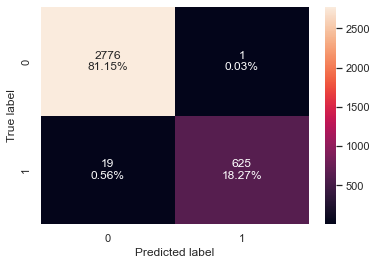

<IPython.core.display.Javascript object>

In [69]:
# Showing the confusion matrix on the Bagging train dataset
confusion_matrix_sklearn(bagging, x_train, y_train)

In [70]:
# Show model performance on the Bagging training dataset
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, x_train, y_train
)
bagging_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.994154,0.970497,0.998403,0.984252


<IPython.core.display.Javascript object>

#### Checking Bagging Classifier model performance on test dataset

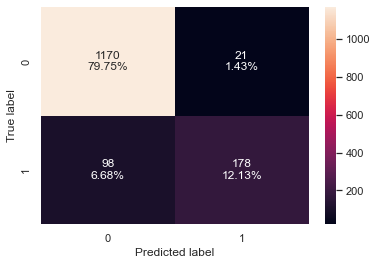

<IPython.core.display.Javascript object>

In [71]:
# Showing the confusion matrix on the Bagging test dataset
confusion_matrix_sklearn(bagging, x_test, y_test)

In [72]:
# Show model performance on the Bagging test dataset
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, x_test, y_test
)
bagging_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.918882,0.644928,0.894472,0.749474


<IPython.core.display.Javascript object>

- Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

# Random Forest Model

In [73]:
# create the Random Forest model
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking Random Forest model performance on training dataset

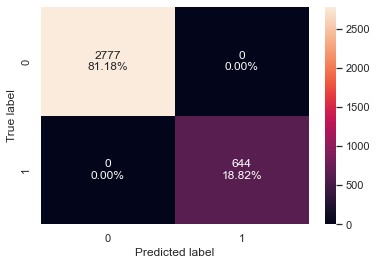

<IPython.core.display.Javascript object>

In [74]:
# Showing the confusion matrix on the Random Forest train dataset
confusion_matrix_sklearn(rf, x_train, y_train)

In [75]:
# Show model performance on the Random Forest training dataset
rf_model_train_perf = model_performance_classification_sklearn(rf, x_train, y_train)
rf_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking Random Forest model performance on test dataset

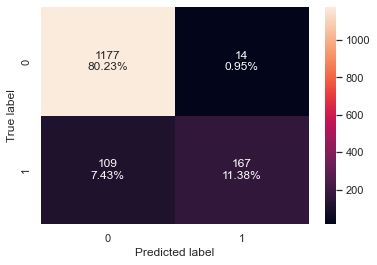

<IPython.core.display.Javascript object>

In [76]:
# Showing the confusion matrix on the Random Forest test dataset
confusion_matrix_sklearn(rf, x_test, y_test)

In [77]:
# Show model performance on the Random Forest test dataset
rf_model_test_perf = model_performance_classification_sklearn(rf, x_test, y_test)
rf_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.916155,0.605072,0.922652,0.730853


<IPython.core.display.Javascript object>

- Random Forest is overfitting on the training dataset and is performing poorly on the test set in terms of recall.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

# Decision Tree Model

In [78]:
# Creating the Decision Tree Model
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking Decision Tree model performance on training dataset

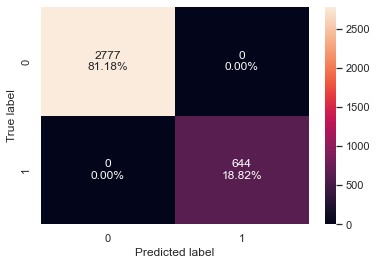

<IPython.core.display.Javascript object>

In [79]:
# Showing the confusion matrix on the Decision Tree train dataset
confusion_matrix_sklearn(dtree, x_train, y_train)

In [80]:
# Show model performance on the Decision Tree training dataset
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, x_train, y_train
)
dtree_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking Decision Tree model performance on test dataset

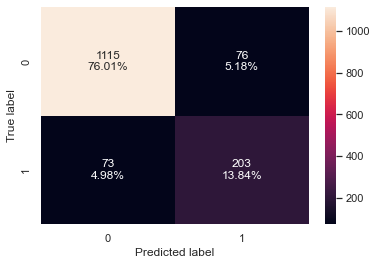

<IPython.core.display.Javascript object>

In [81]:
# Showing the confusion matrix on the Decision Tree test dataset
confusion_matrix_sklearn(dtree, x_test, y_test)

In [82]:
# Show model performance on the Decision Tree test dataset
dtree_model_test_perf = model_performance_classification_sklearn(dtree, x_test, y_test)
dtree_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.898432,0.735507,0.727599,0.731532


<IPython.core.display.Javascript object>

- Decision Tree is overfitting on the training dataset and is preforming better than Bagging and Random Forest in terms of Recall.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

# Tuning Models using GridSearch for Hyperparameters

## Tuning Bagging Classifier

In [83]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {
    "base_estimator": [cl1],
    "n_estimators": [25, 50, 95, 101, 105],
    "max_features": [0.7, 0.8, 0.9, 1],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="recall",
    cv=5,
)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [25, 50, 95, 101, 105]},
             scoring='recall')

<IPython.core.display.Javascript object>

In [84]:
# getting the best estimator
bagging_tuned = grid.best_estimator_
bagging_tuned.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=101, random_state=1)

<IPython.core.display.Javascript object>

#### Checking Tuned Bagging Classifier model performance on training dataset

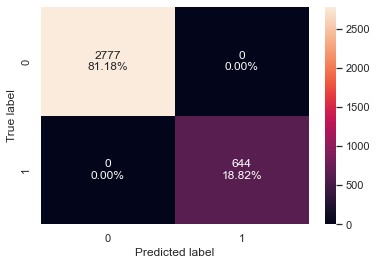

<IPython.core.display.Javascript object>

In [85]:
# Showing the confusion matrix on the Tuned Bagging train dataset
confusion_matrix_sklearn(bagging_tuned, x_train, y_train)

In [86]:
# Show model performance on the Tuned Bagging train dataset
bagging_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_tuned, x_train, y_train
)
bagging_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking Tuned Bagging Classifier model performance on test dataset

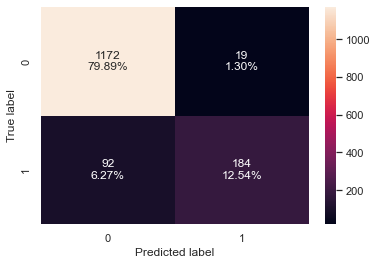

<IPython.core.display.Javascript object>

In [87]:
# Showing the confusion matrix on the Tuned Bagging test dataset
confusion_matrix_sklearn(bagging_tuned, x_test, y_test)

In [88]:
# Show model performance on the Tuned Bagging test dataset
bagging_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_tuned, x_test, y_test
)
bagging_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.924335,0.666667,0.906404,0.768267


<IPython.core.display.Javascript object>

- Tuned Bagging classifier is still overfitting on the training set and is performing a little better on the test set in terms of recall.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

## Tuning Random Forest

In [89]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, "log2", "auto"],
    "max_samples": [0.7, 0.9, None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [90]:
# getting the best estimator
rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, n_estimators=251, random_state=1)

<IPython.core.display.Javascript object>

#### Checking Tuned Random Forest model performance on training dataset

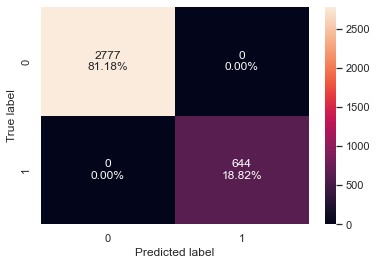

<IPython.core.display.Javascript object>

In [91]:
# Showing the confusion matrix on the Tuned Random Forest train dataset
confusion_matrix_sklearn(rf_tuned, x_train, y_train)

In [92]:
# Show model performance on the Tuned Random Forest train dataset
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, x_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking Tuned Random Forest model performance on test dataset

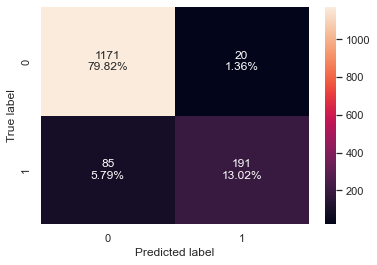

<IPython.core.display.Javascript object>

In [93]:
# Showing the confusion matrix on the Tuned Random Forest test dataset
confusion_matrix_sklearn(rf_tuned, x_test, y_test)

In [94]:
# Show model performance on the Tuned Random Forest test dataset
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, x_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.928425,0.692029,0.905213,0.784394


<IPython.core.display.Javascript object>

- Tuned Random Forest is still overfitting on the training set and is performing a little better on the test set in terms of recall.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

## Tuning Decision Tree

In [95]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15, None],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [96]:
# getting the best estimator
dtree_tuned = grid_obj.best_estimator_
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=18, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking Tuned Decision Tree model performance on training dataset

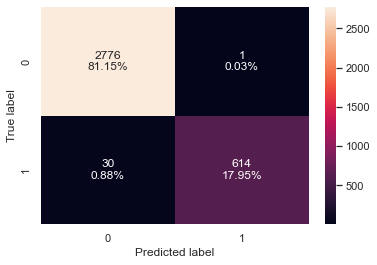

<IPython.core.display.Javascript object>

In [97]:
# Showing the confusion matrix on the Tuned Decision Tree train dataset
confusion_matrix_sklearn(dtree_tuned, x_train, y_train)

In [98]:
# Show model performance on the Tuned Decision Tree train dataset
dtree_tuned_model_train_perf = model_performance_classification_sklearn(
    dtree_tuned, x_train, y_train
)
dtree_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.990938,0.953416,0.998374,0.975377


<IPython.core.display.Javascript object>

#### Checking Tuned Decision Tree model performance on test dataset

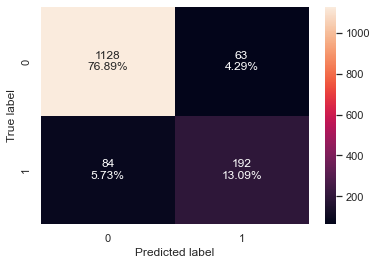

<IPython.core.display.Javascript object>

In [99]:
# Showing the confusion matrix on the Tuned Decision Tree test dataset
confusion_matrix_sklearn(dtree_tuned, x_test, y_test)

In [100]:
# Show model performance on the Tuned Decision Tree test dataset
dtree_tuned_model_test_perf = model_performance_classification_sklearn(
    dtree_tuned, x_test, y_test
)
dtree_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.899796,0.695652,0.752941,0.723164


<IPython.core.display.Javascript object>

- Tuned Decision Tree is still overfitting on the training set and is performing a little worst on the test set in terms of recall.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

## Comparing all the models

In [101]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_model_train_perf.T,
        rf_model_train_perf.T,
        dtree_model_train_perf.T,
        bagging_tuned_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree",
    "Bagging Tuned",
    "Random Forest Tuned",
    "Decision Tree Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Random Forest Classifier,Decision Tree,Bagging Tuned,Random Forest Tuned,Decision Tree Tuned
Accuracy,0.994154,1.0,1.0,1.0,1.0,0.990938
Recall,0.970497,1.0,1.0,1.0,1.0,0.953416
Precision,0.998403,1.0,1.0,1.0,1.0,0.998374
F1,0.984252,1.0,1.0,1.0,1.0,0.975377


<IPython.core.display.Javascript object>

In [102]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        bagging_model_test_perf.T,
        rf_model_test_perf.T,
        dtree_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree",
    "Bagging Tuned",
    "Random Forest Tuned",
    "Decision Tree Tuned",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Bagging Classifier,Random Forest Classifier,Decision Tree,Bagging Tuned,Random Forest Tuned,Decision Tree Tuned
Accuracy,0.918882,0.916155,0.898432,0.924335,0.928425,0.899796
Recall,0.644928,0.605072,0.735507,0.666667,0.692029,0.695652
Precision,0.894472,0.922652,0.727599,0.906404,0.905213,0.752941
F1,0.749474,0.730853,0.731532,0.768267,0.784394,0.723164


<IPython.core.display.Javascript object>

- Decision tree recall performance is the best compared to all the test dataset.
- The Tuned Random Forest performed better than Decision Tree overall with about the same recall as the Decision tree.
- The Tuned Random Forest would be the better model that we looked at so far
- Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but actually did take a travel package.

## Feature Importance of Tuned Random Forest

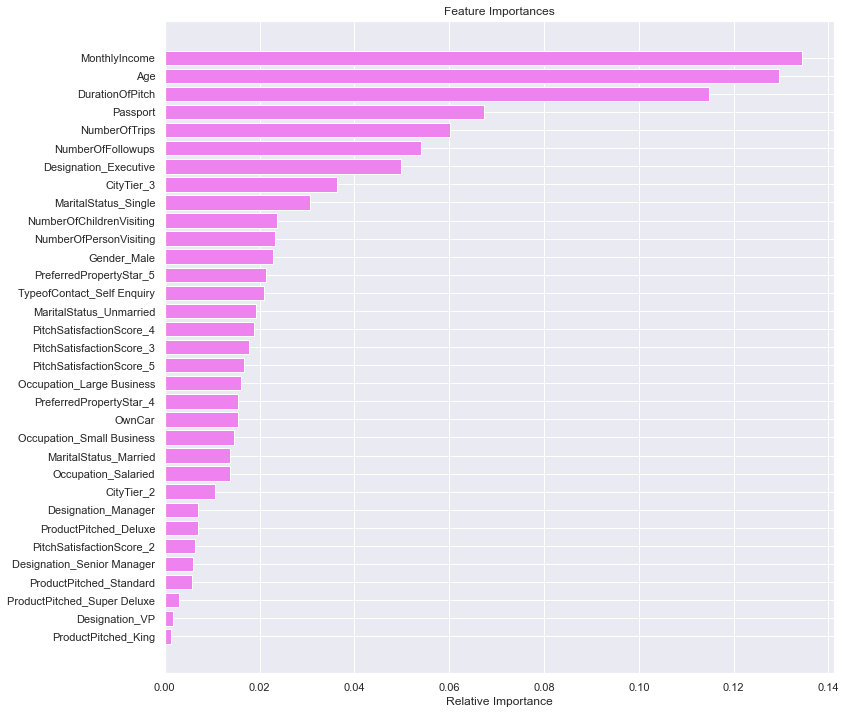

<IPython.core.display.Javascript object>

In [103]:
# Create chart showing the order of most important features for the Tuned Random Forest
feature_names = x_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Monthly Income, Age, and Duration of Pitch are the most important features on determining if customer will take Tourism Package

# AdaBoost Model

In [104]:
# Creating the AdaBoost Model
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking AdaBoost model performance on training dataset

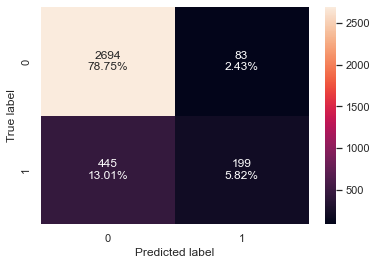

<IPython.core.display.Javascript object>

In [105]:
# Showing the confusion matrix on the AdaBoost train dataset
confusion_matrix_sklearn(abc, x_train, y_train)

In [106]:
# Show model performance on the AdaBoost train dataset
abc_model_train_perf = model_performance_classification_sklearn(abc, x_train, y_train)
abc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.845659,0.309006,0.705674,0.429806


<IPython.core.display.Javascript object>

#### Checking AdaBoost model performance on test dataset

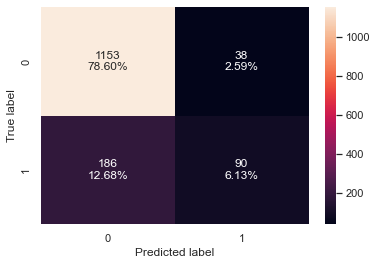

<IPython.core.display.Javascript object>

In [107]:
# Showing the confusion matrix on the AdaBoost test dataset
confusion_matrix_sklearn(abc, x_test, y_test)

In [108]:
# Show model performance on the AdaBoost test dataset
abc_model_test_perf = model_performance_classification_sklearn(abc, x_test, y_test)
abc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.847307,0.326087,0.703125,0.445545


<IPython.core.display.Javascript object>

- AdaBoost Model is not overfitting the training data but Recall is preforming very poorly on both train and test dataset.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package. 

# GradientBoost Model

In [110]:
# Creating the GradientBoost Model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking GradientBoost model performance on training dataset

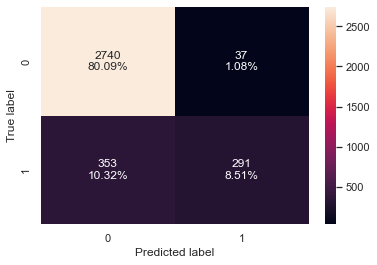

<IPython.core.display.Javascript object>

In [111]:
# Showing the confusion matrix on the GradientBoost train dataset
confusion_matrix_sklearn(gbc, x_train, y_train)

In [112]:
# Show model performance on the GradientBoost train dataset
gbc_model_train_perf = model_performance_classification_sklearn(gbc, x_train, y_train)
gbc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.885998,0.451863,0.887195,0.598765


<IPython.core.display.Javascript object>

#### Checking GradientBoost model performance on test dataset

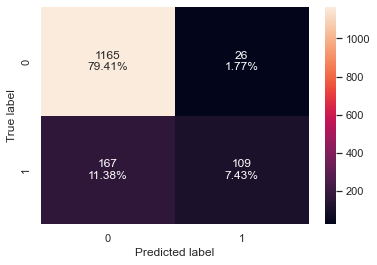

<IPython.core.display.Javascript object>

In [113]:
# Showing the confusion matrix on the GradientBoost test dataset
confusion_matrix_sklearn(gbc, x_test, y_test)

In [114]:
# Show model performance on the GradientBoost test dataset
gbc_model_test_perf = model_performance_classification_sklearn(gbc, x_test, y_test)
gbc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.868439,0.394928,0.807407,0.530414


<IPython.core.display.Javascript object>

- GradientBoost Model is not overfitting the training data but Recall is preforming very poorly on both train and test dataset.  Recall is only slightly better than AdaBoost Model.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package. 

# XGBoost Model

In [117]:
# Creating the XGBoost Model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

#### Checking XGBoost model performance on training dataset

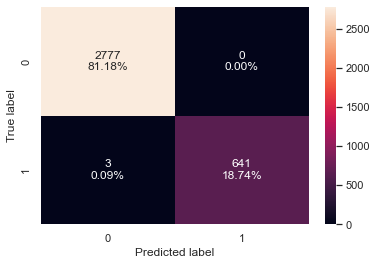

<IPython.core.display.Javascript object>

In [118]:
# Showing the confusion matrix on the XGBoost train dataset
confusion_matrix_sklearn(xgb, x_train, y_train)

In [119]:
# Show model performance on the XGBoost train dataset
xgb_model_train_perf = model_performance_classification_sklearn(xgb, x_train, y_train)
xgb_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999123,0.995342,1.0,0.997665


<IPython.core.display.Javascript object>

#### Checking XGBoost model performance on test dataset

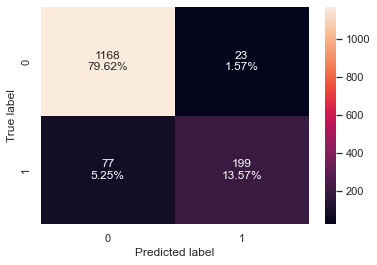

<IPython.core.display.Javascript object>

In [120]:
# Showing the confusion matrix on the XGBoost test dataset
confusion_matrix_sklearn(xgb, x_test, y_test)

In [121]:
# Show model performance on the XGBoost test dataset
xgb_model_test_perf = model_performance_classification_sklearn(xgb, x_test, y_test)
xgb_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.931834,0.721014,0.896396,0.799197


<IPython.core.display.Javascript object>

- XGBoost Model is slightly overfitting the training data and Recall is preforming better on both train and test dataset compared to AdaBoost and GradientBoost.  This is the best performing model so far.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package. 

# Stacking Classifier Model

In [154]:
# Creating the Stacking Classifier Model
estimators = [
    ("Random Forest", rf_tuned),
    ("Adaptive Boosting", abc),
    ("Gradient Boosting", gbc),
]
final_estimator = xgb
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.7,
                                                       n_estimators=251,
                                                       random_state=1)),
                               ('Adaptive Boosting',
                                AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 callbacks=None,
                                                 colsample_bylevel=1,
                                                 colsample_b...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
       

<IPython.core.display.Javascript object>

#### Checking Stacking Classifier model performance on training dataset

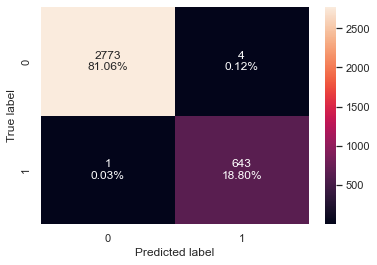

<IPython.core.display.Javascript object>

In [155]:
# Showing the confusion matrix on the Stacking Classifier train dataset
confusion_matrix_sklearn(stacking_classifier, x_train, y_train)

In [156]:
# Show model performance on the Stacking Classifier train dataset
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, x_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998538,0.998447,0.993818,0.996127


<IPython.core.display.Javascript object>

#### Checking Stacking Classifier model performance on test dataset

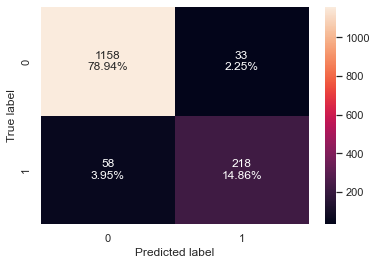

<IPython.core.display.Javascript object>

In [157]:
# Showing the confusion matrix on the Stacking Classifier test dataset
confusion_matrix_sklearn(stacking_classifier, x_test, y_test)

In [158]:
# Show model performance on the Stacking Classifier test dataset
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, x_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.937969,0.789855,0.868526,0.827324


<IPython.core.display.Javascript object>

- Stacking Classifier Model is slightly overfitting the training data and Recall is preforming better on both train and test dataset compared to all other models we did so far.  Recall is good with 79% and Accuracy at 94%.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

# Tuning Models using GridSearch for Hyperparameters

## Tuning AdaBoost Model

In [135]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [136]:
# getting the best estimator
abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.7000000000000002, n_estimators=90,
                   random_state=1)

<IPython.core.display.Javascript object>

#### Checking Tuned AdaBoost Model performance on training dataset

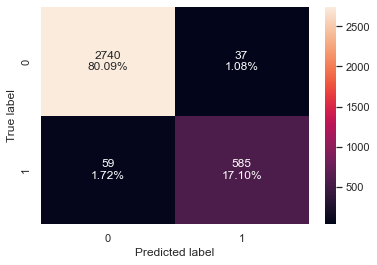

<IPython.core.display.Javascript object>

In [137]:
# Showing the confusion matrix on the Tuned AdaBoost train dataset
confusion_matrix_sklearn(abc_tuned, x_train, y_train)

In [138]:
# Show model performance on the Tuned AdaBoost train dataset
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, x_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.971938,0.908385,0.940514,0.924171


<IPython.core.display.Javascript object>

#### Checking Tuned AdaBoost Model performance on test dataset

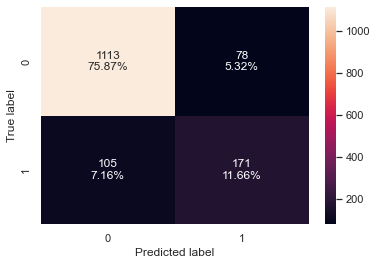

<IPython.core.display.Javascript object>

In [139]:
# Showing the confusion matrix on the Tuned AdaBoost test dataset
confusion_matrix_sklearn(abc_tuned, x_test, y_test)

In [140]:
# Show model performance on the Tuned AdaBoost test dataset
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, x_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.875256,0.619565,0.686747,0.651429


<IPython.core.display.Javascript object>

- Tuned AdaBoost Model is overfitting the training data and Recall is preforming poorly on test dataset.  Recall is much better than just default AdaBoost.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

## Tuning Gradient Boost Model

In [141]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [142]:
# getting the best estimator
gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

#### Checking Tuned Gradient Boost Model performance on training dataset

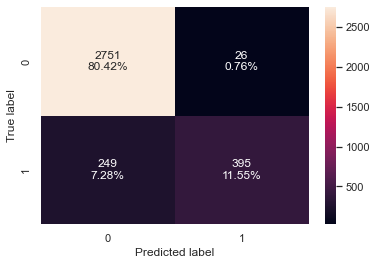

<IPython.core.display.Javascript object>

In [143]:
# Showing the confusion matrix on the Tuned Gradient Boost train dataset
confusion_matrix_sklearn(gbc_tuned, x_train, y_train)

In [144]:
# Show model performance on the Tuned Gradient Boost train dataset
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, x_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.919614,0.613354,0.938242,0.741784


<IPython.core.display.Javascript object>

#### Checking Tuned Gradient Boost Model performance on test dataset

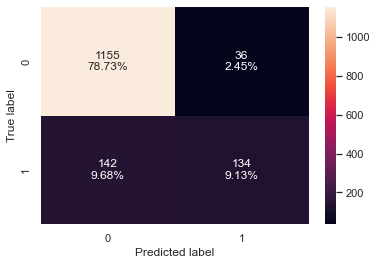

<IPython.core.display.Javascript object>

In [145]:
# Showing the confusion matrix on the Tuned Gradient Boost test dataset
confusion_matrix_sklearn(gbc_tuned, x_test, y_test)

In [146]:
# Show model performance on the Tuned Gradient Boost test dataset
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, x_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.878664,0.485507,0.788235,0.600897


<IPython.core.display.Javascript object>

- Tuned Gradient Boost Model is slightly overfitting the training data and Recall is preforming poorly on both training and test dataset.  Recall is better than just default Gradient Boost.   Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

## Tuning XGBoost Model

In [147]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [148]:
# getting the best estimator
xgb_tuned = grid_obj.best_estimator_
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

#### Checking Tuned XGBoost Model performance on training dataset

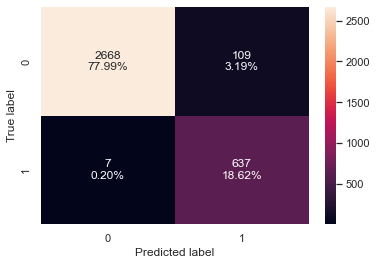

<IPython.core.display.Javascript object>

In [149]:
# Showing the confusion matrix on the Tuned XGBoost train dataset
confusion_matrix_sklearn(xgb_tuned, x_train, y_train)

In [150]:
# Show model performance on the Tuned XGBoost train dataset
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, x_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.966092,0.98913,0.853887,0.916547


<IPython.core.display.Javascript object>

#### Checking Tuned XGBoost Model performance on test dataset

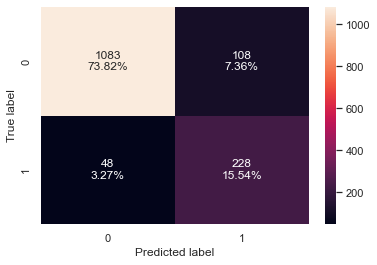

<IPython.core.display.Javascript object>

In [151]:
# Showing the confusion matrix on the Tuned XGBoost test dataset
confusion_matrix_sklearn(xgb_tuned, x_test, y_test)

In [152]:
# Show model performance on the Tuned XGBoost test dataset
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, x_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.893661,0.826087,0.678571,0.745098


<IPython.core.display.Javascript object>

- Tuned XGBoost Model is slightly overfitting the training data and Recall is preforming much better on both training and test dataset.  Recall is better than just default XGBoost.  Recall is 83% and Accuracy is 89%.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

# Stacking Classifier using Tuned Models

In [160]:
# Creating the Stacking Classifier using Tuned Models
estimators = [
    ("Random Forest", rf_tuned),
    ("Adaptive Boosting", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = xgb_tuned
stacking_classifier_tuned = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
stacking_classifier_tuned.fit(x_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.7,
                                                       n_estimators=251,
                                                       random_state=1)),
                               ('Adaptive Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.7000000000000002,
                                                   n_estimators=90,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(ra...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise

<IPython.core.display.Javascript object>

#### Checking Stacking Classifier performance on training dataset  (using tuned models)

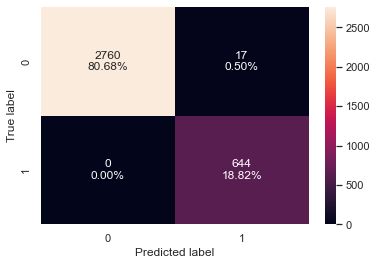

<IPython.core.display.Javascript object>

In [161]:
# Showing the confusion matrix on the Stacking Classifier train dataset (using tuned models)
confusion_matrix_sklearn(stacking_classifier_tuned, x_train, y_train)

In [162]:
# Show model performance on the Stacking Classifier train dataset (using tuned models)
stacking_classifier_tuned_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier_tuned, x_train, y_train
)
stacking_classifier_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995031,1.0,0.974281,0.986973


<IPython.core.display.Javascript object>

#### Checking Stacking Classifier performance on test dataset  (using tuned models)

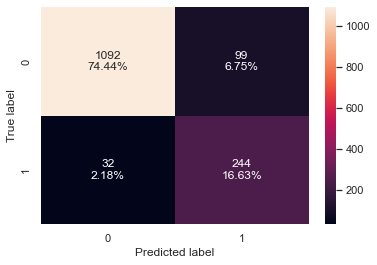

<IPython.core.display.Javascript object>

In [163]:
# Showing the confusion matrix on the Stacking Classifier test dataset (using tuned models)
confusion_matrix_sklearn(stacking_classifier_tuned, x_test, y_test)

In [164]:
# Show model performance on the Stacking Classifier test dataset (using tuned models)
stacking_classifier_tuned_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier_tuned, x_test, y_test
)
stacking_classifier_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.910702,0.884058,0.71137,0.788368


<IPython.core.display.Javascript object>

-  Stacking Classifier using Tuned Models is slightly overfitting the training data and Recall is preforming much better on both training and test dataset.  Recall is better than just using untuned models.  Recall is 88.4% and Accuracy is 91.1%.  Recall is the most important performance matrix because we want to identify as many customers that will take the Tourism Package as possible and don't want to many customers that we identify as not taking a Tourism Package but did take a travel package.

## Comparing all the models

In [166]:
# Training performance comparison

models2_train_comp_df = pd.concat(
    [
        abc_model_train_perf.T,
        gbc_model_train_perf.T,
        xgb_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_tuned_model_train_perf.T,
    ],
    axis=1,
)
models2_train_comp_df.columns = [
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extreme Gradient Boosting",
    "Stacking Classifier",
    "Tuned Adaptive Boosting",
    "Tuned Gradient Boosting",
    "Tuned Extreme Gradient Boosting",
    "Stacking Classifier using Tuned Models",
]
print("Training performance comparison:")
models2_train_comp_df

Training performance comparison:


,Adaptive Boosting,Gradient Boosting,Extreme Gradient Boosting,Stacking Classifier,Tuned Adaptive Boosting,Tuned Gradient Boosting,Tuned Extreme Gradient Boosting,Stacking Classifier using Tuned Models
Accuracy,0.845659,0.885998,0.999123,0.998538,0.971938,0.919614,0.966092,0.995031
Recall,0.309006,0.451863,0.995342,0.998447,0.908385,0.613354,0.989130,1.000000
Precision,0.705674,0.887195,1.000000,0.993818,0.940514,0.938242,0.853887,0.974281
F1,0.429806,0.598765,0.997665,0.996127,0.924171,0.741784,0.916547,0.986973


<IPython.core.display.Javascript object>

In [167]:
# Test performance comparison

models2_test_comp_df = pd.concat(
    [
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        xgb_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_tuned_model_test_perf.T,
    ],
    axis=1,
)
models2_test_comp_df.columns = [
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extreme Gradient Boosting",
    "Stacking Classifier",
    "Tuned Adaptive Boosting",
    "Tuned Gradient Boosting",
    "Tuned Extreme Gradient Boosting",
    "Stacking Classifier using Tuned Models",
]
print("Training performance comparison:")
models2_test_comp_df

Training performance comparison:


,Adaptive Boosting,Gradient Boosting,Extreme Gradient Boosting,Stacking Classifier,Tuned Adaptive Boosting,Tuned Gradient Boosting,Tuned Extreme Gradient Boosting,Stacking Classifier using Tuned Models
Accuracy,0.847307,0.868439,0.931834,0.937969,0.875256,0.878664,0.893661,0.910702
Recall,0.326087,0.394928,0.721014,0.789855,0.619565,0.485507,0.826087,0.884058
Precision,0.703125,0.807407,0.896396,0.868526,0.686747,0.788235,0.678571,0.711370
F1,0.445545,0.530414,0.799197,0.827324,0.651429,0.600897,0.745098,0.788368


<IPython.core.display.Javascript object>

- Stacking Classifier using tuned Models is performing better than all other models with Recall of 88.4% and Accuracy of 91.1%
- All the tuned models are performing better than just using default models
- Stacking Classifier using tuned Models is performing better than the Tuned Random Forest
- Stacking Classifier using tuned Models is the model we will go with to target potential customers for tourism company "Visit with us"

# Insights & Recommendations for tourism company "Visit with us"

- The Stacking Classifier using tuned models is the best model to identify potential customers who will take a Tourism Package with "Visit with us"
- The Stacking Classifier using tuned models has a Recall score of 88.4% and Accuracy score of 91.1%
- 71% of the customers was "Self Enquiry" so I recommend "Visit with us" run some Ads to let people know about what "Visit with us" offers.
- Younger age group customers are more likely to take Tourism Package than older age group so this would be a great group to target Ads for
- The basic package is the most purchased package that "Visit with us" offers so if customer does not want one of the other package I would see if they are interested in this package as a go to package
- I recommend "Visit with us" target customers with certain packages based on Age, Monthly Income, and Designation
- **King Tourism Package:**
- Designation: VP
- Monthly income: 34,000-40,000
- Age: 42-61
- **Super Deluxe Tourism Package:**
- Designation: AVP
- Monthly income: 30,000-35,000
- Age: 43-60
- **Standard Tourism Package:**
- Designation: Senior Manager
- Monthly income: 24,000-30,000
- Age: 35-46
- **Deluxe Tourism Package:**
- Designation: Manager
- Monthly income: 21,000-25,000
- Age: 32-42
- **Basic Tourism Package:**
- Designation: Executive
- Monthly income: 15,000-22,000
- Age: 18-36
- **NEW Wellness Tourism Package:**
- Customers traveling alone usually will not take any of the other Tourism Package so the Wellness Package would be a great package to offer these customers
- Target any customers that want to kick start a healthy lifestyle and increase one's sense of well-being
- Older age groups are less likely to take one of the other Tourism Package so this would be a great group to target for this package